In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format ='retina'
from glob import glob
import glob
import main_functions as mvs
#import pwlf
%matplotlib inline
import plots_obs as obs
#import missingno as mis
import matplotlib.pylab as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from datetime import datetime
from datetime import timedelta

In [2]:

import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point, MultiPoint, Polygon, MultiPolygon
import os
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from zipfile import ZipFile as zzip
import requests

sys.path.append(os.path.realpath('..'))

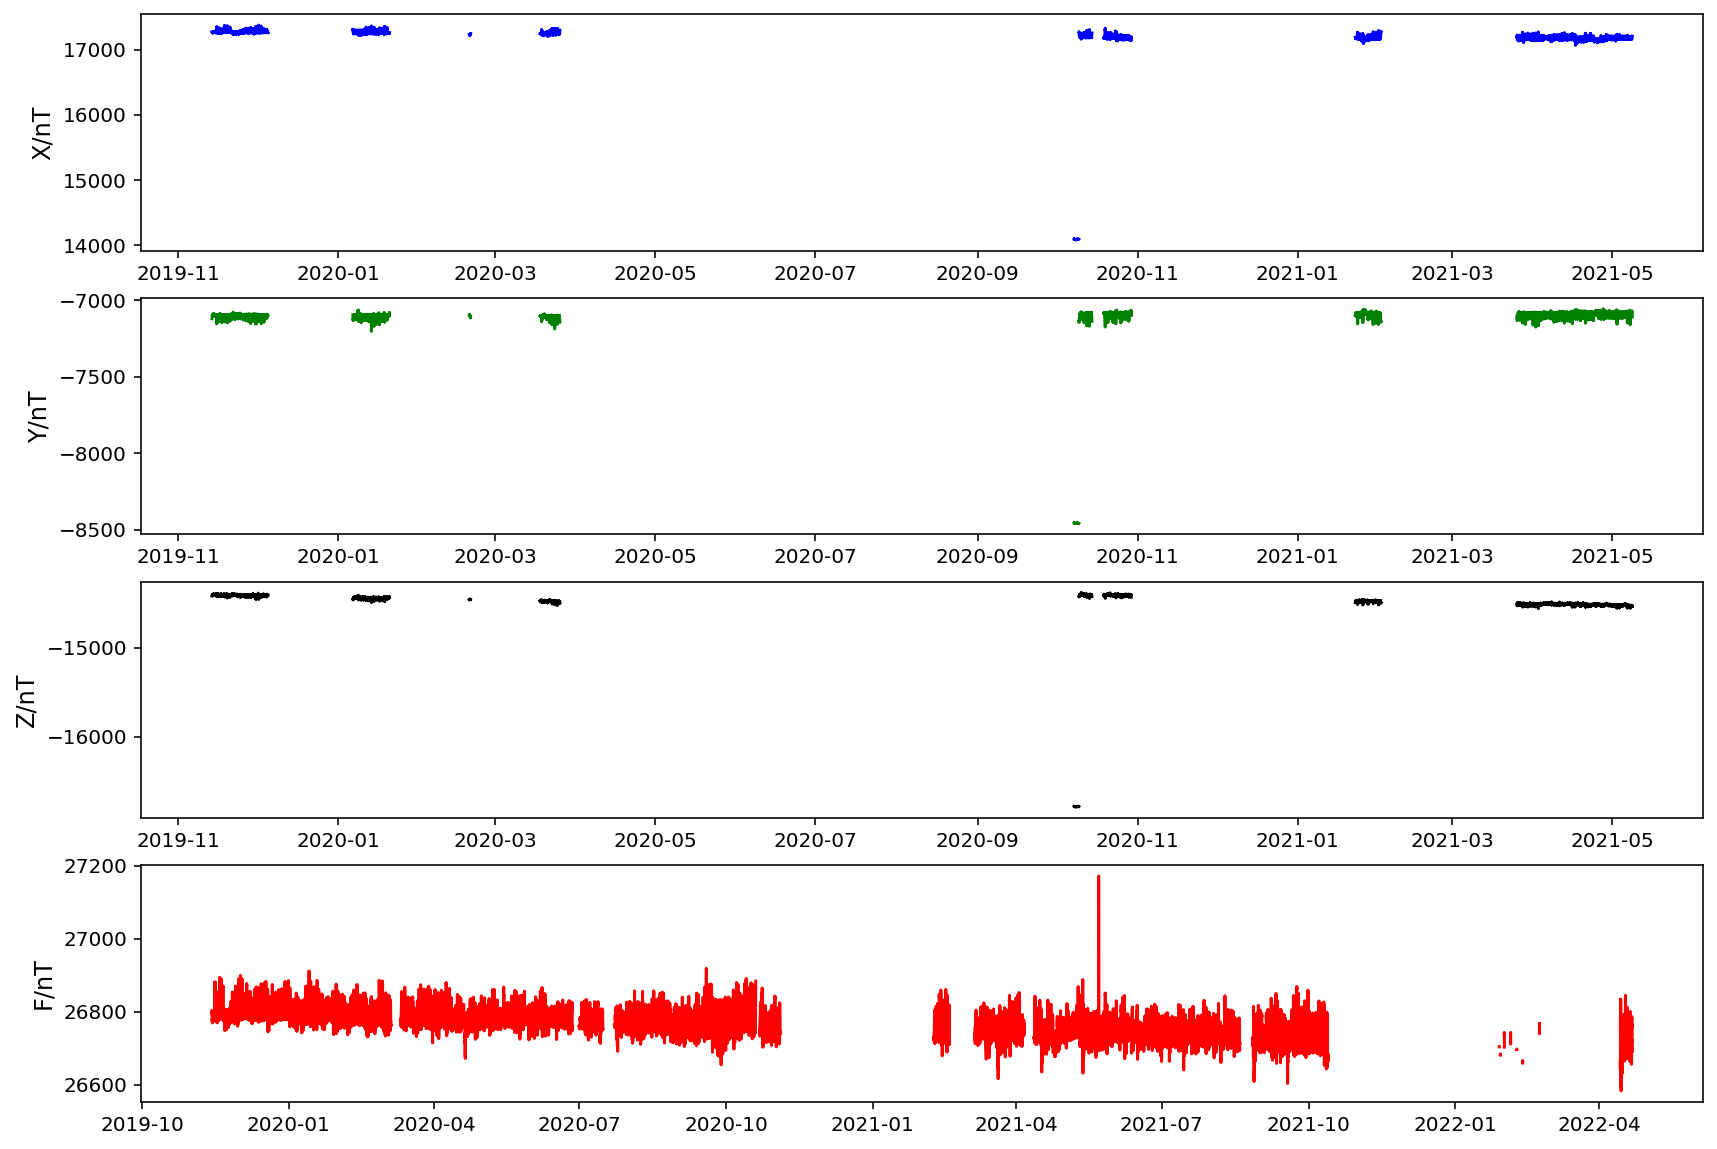

In [12]:
df_MAA = obs.obs_data_processing(station = 'MAA',path = 'C:\\Users\\marco\\Downloads\\Thesis_notebooks\\maa_data', starttime = None,
                        endtime = None, sample = None, plots = True)

In [14]:
df_MAA['2021-05']

C:\Users\marco\AppData\Local\Temp\ipykernel_6532\2320328426.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_MAA['2021-05']


,X,Y,Z,F
Date,,,,
2021-05-01 00:01:00,17160.64,-7088.96,-14519.12,26739.84
2021-05-01 00:02:00,17161.66,-7089.06,-14518.58,26740.22
2021-05-01 00:03:00,17163.11,-7089.80,-14517.79,26739.87
2021-05-01 00:04:00,17164.32,-7090.47,-14517.20,26739.36
2021-05-01 00:05:00,17165.09,-7090.65,-14516.97,26738.89
...,...,...,...,...
2021-05-31 23:55:00,NaN,NaN,NaN,26724.58
2021-05-31 23:56:00,NaN,NaN,NaN,26724.55
2021-05-31 23:57:00,NaN,NaN,NaN,26724.57


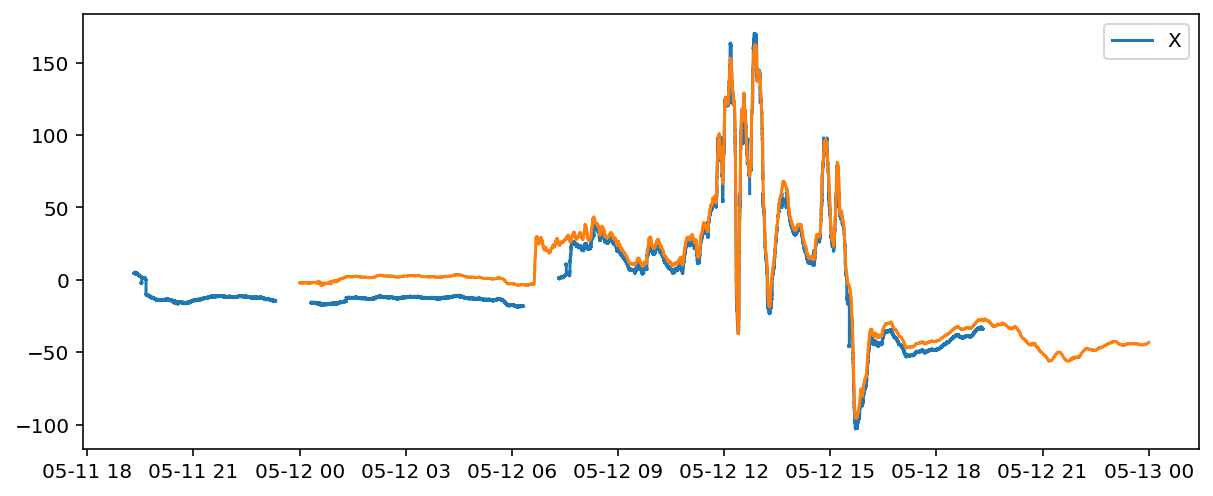

In [920]:
#df_ppm.dropna()
#df_sec.dropna()
#df_sec.reindex(df_ppm.index)
#
#
#obs_x = (df_sec.loc['2021-04-16']['X'] - df_sec.loc['2021-04-16']['X'].mean()).shift(-4.7, 'h').reindex(obs_f.index)
#obs_x = obs_x.dropna()
#obs_f = (df_ppm.loc['2021-04-16']['F'] - df_ppm.loc['2021-04-16']['F'].mean()).dropna()
#obs_f = obs_f.dropna()
#
#rms = mean_squared_error(obs_x,
#           obs_f.reindex(obs_x.index),
#           squared=True)

plt.figure(figsize = (10,4))
plt.plot((df_sec['X'] - df_sec['X'].mean()).shift(-4.6772, 'h'), label = 'X' )
plt.plot(df_ppm['F'] - df_ppm['F'].mean())
#plt.xlim(df_ppm['F'].index[67000], df_ppm['F'].index[70000])
#plt.ylim(20,55)
plt.legend()

In [921]:
((df_sec['X'] - df_sec['X'].mean()).shift(-4.6772, 'h')).corr(df_ppm['F'] - df_ppm['F'].mean())

nan

In [674]:
np.argmax(np.correlate((df_sec['X'] - df_sec['X'].mean()),
                       (df_ppm['F'] - df_ppm['F'].mean())))

0

In [577]:
step = np.arange(1,1000,1)
df_rms = pd.DataFrame()


rms_list = [[],[]]
for i in step:
    
    maa_f = (df_MAA.loc['2019-11-21']['F'] - df_MAA.loc['2019-11-21']['F'].mean())
    maa_x = (df_MAA.loc['2019-11-21']['X'] - df_MAA.loc['2019-11-21']['X'].mean()).shift(-i, 'min').reindex(maa_f.index)
    maa_x = maa_x.dropna()
    
    rms = mean_squared_error(maa_x,
                       maa_f.reindex(maa_x.index),
                       squared=True)
    rms_list[0].append(rms)
    rms_list[1].append(i/60)
    
df_rms['RMS'] = rms_list[0]
df_rms['Time'] = rms_list[1]
print(min(rms_list[0]))

KeyboardInterrupt: 

In [122]:
df_rms.loc[df_rms['RMS'] ==  df_rms['RMS'].min()]

,RMS,Time
0,9.593206,0.016667


In [109]:
df_rms.loc[df_rms['RMS'] ==  df_rms['RMS'].min()]

,RMS,Time
280,7.129951,4.683333


In [114]:
df_rms.loc[df_rms['RMS'] ==  df_rms['RMS'].min()]

,RMS,Time
281,3.717843,4.7


In [67]:
rms = [[],[]]

In [393]:
maa_f = (df_MAA.loc['2021-05-08']['F'] - df_MAA.loc['2021-05-08']['F'].mean())
maa_x = (df_MAA.loc['2021-05-08']['X'] - df_MAA.loc['2021-05-08']['X'].mean()).shift(-4.2, 'H').reindex(maa_f.index)
maa_x = maa_x.dropna()

C:\Users\marco\AppData\Local\Temp\ipykernel_19812\3708523721.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_MAA['2021-05-08'].plot(subplots = True, figsize = (16,10))


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

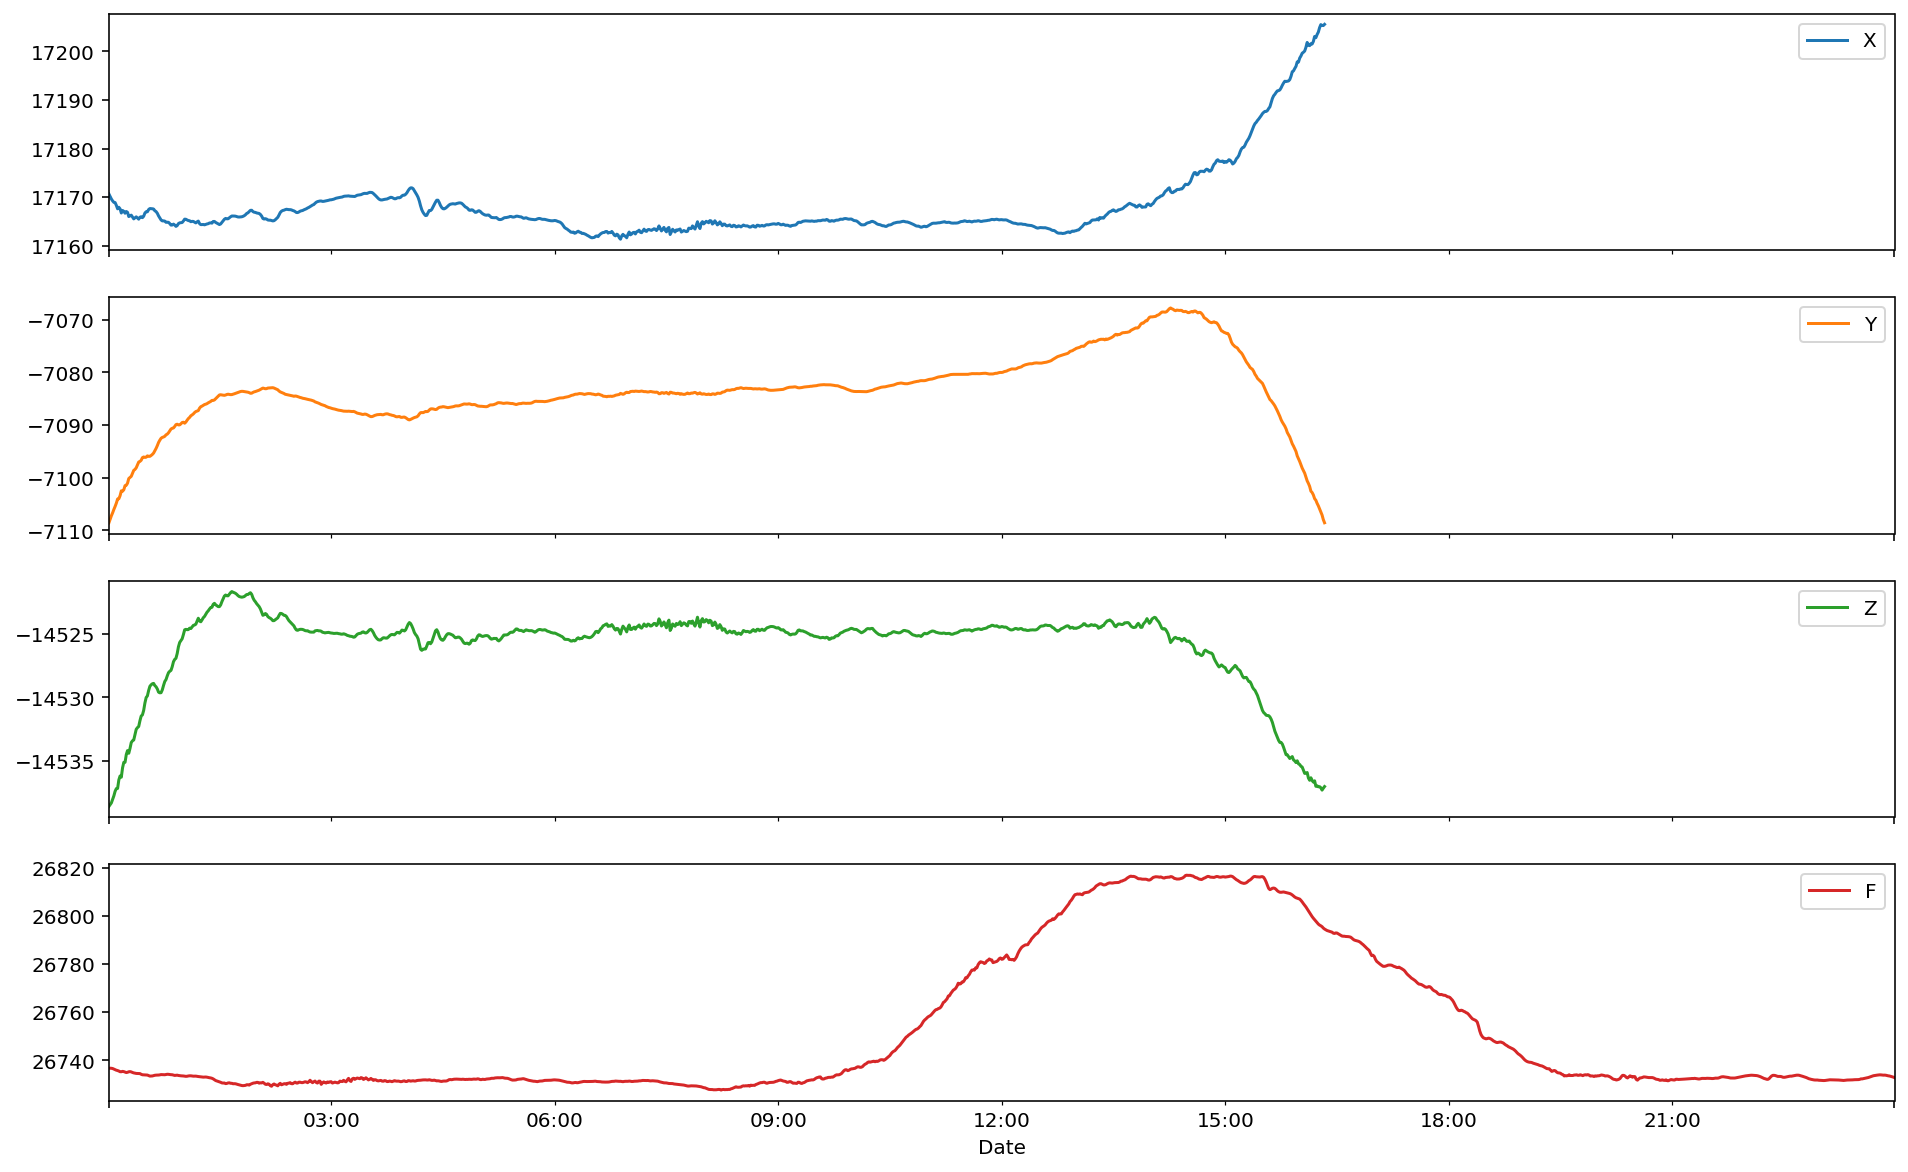

In [394]:
df_MAA['2021-05-08'].plot(subplots = True, figsize = (16,10))

In [961]:
def time_shift_obs(obs:str,
                   start_date: str,
                   end_date:str,
                   window_size: int,
                   step: int = 1
                  ):
    
    obs = obs.upper()
    if obs not in ['MAA0', 'TTB0']:
        print(f'obs must be MAA or TTB')
        
    files_sec = []
    files_ppm = []
    dates_ppm = []
    dates_sec = []
    df_RMS = pd.DataFrame()
    window_size = np.arange(1, window_size, step)
        
    #setting path to the files
    
    path = f'O:/jmat/{obs}'
        
    #creating an array with the days that will be investigated in the file date format    
    date_range_file_format = pd.date_range(start_date,
                                           end_date,
                                           freq = 'D').strftime('%Y%m%d')
    
    #creating an array with the days that will be investigated
    date_range = pd.date_range(start_date,
                               end_date,
                               freq = 'D')
    
    #loop over dates to store ppm and sec files path
    for date in date_range_file_format:
        
        file_path_ppm = f'{path}/{obs}_{date}.ppm'
        file_path_sec = f'{path}/{obs}_{date}.sec'
        
        if os.path.exists(file_path_ppm) == True:
            
            files_ppm.append(file_path_ppm)
            dates_ppm.append(date)
            
        if os.path.exists(file_path_sec) == True:
            
            dates_sec.append(date)
            files_sec.append(file_path_sec)

    if dates_ppm != dates_sec:
        
        days_with_both_files = list(set(dates_ppm).intersection(dates_sec))
        
        #checking if there is at least one day with both files
        if days_with_both_files == []:
            print('No data to check')
        else:
            #converting days_with_both_files to a int list and sorting it
            new_list = [int(i) for i in days_with_both_files]
            new_list.sort()
        
            days_with_both_files = new_list

    else:
        days_with_both_files = dates_ppm
        
    for date in days_with_both_files:
        
        date_files_format = datetime.strptime(str(date), '%Y%m%d').strftime('%Y-%m-%d')
        
        #creating a dataframe for the ppm file in the date
        df_ppm = pd.read_csv(f'{path}/{obs}_{date}.ppm',
                             header = None,
                             skiprows = 0,
                             sep = '\s+',
                             parse_dates = {'Date': ['date', 'time']},
                             usecols = [1, 2, 3],
                             names = ['date', 'time', 'F'],
                             index_col = 'Date')
        df_ppm.loc[df_ppm['F'] >= 99999.0, 'F'] = np.nan
        df_ppm.loc[df_ppm['F'] == 00000.00, 'F'] = np.nan
        
        #creating a dataframe for the sec file in the date
        df_sec = pd.read_csv(f'{path}/{obs}_{date}.sec',
                     header = None,
                     skiprows = 0,
                     sep = '\s+',
                     usecols = [0, 1, 2, 3],
                     names = ['time', 'X', 'Y', 'Z'],
                     index_col = 'time')
        df_sec.loc[df_sec['X'] >= 99999.0, 'X'] = np.nan
        df_sec.loc[df_sec['Y'] >= 99999.0, 'Y'] = np.nan
        df_sec.loc[df_sec['Z'] >= 99999.0, 'Z'] = np.nan
        
        df_sec.index = pd.date_range(f'{date} {df_sec.index[0]}',f'{date} {df_sec.index[-1]}', freq = 's')
        #F_calc = np.sqrt((df_sec['X']**2 + df_sec['Z']**2))
        #df_sec['F_calc'] = F_calc
        
        df_rms = pd.DataFrame()
        rms_list = [[],[]]
        
        df_ppm.dropna()
        df_sec.dropna()
        df_sec.reindex(df_ppm.index)
        
        print(f'shifting the data to find the best adjust for {date}')
        window = np.arange(14000,18000,1)
        for i in window:
            
            obs_f = (df_ppm.loc[date_files_format]['F'] - df_ppm.loc[date_files_format]['F'].mean()).dropna()
            obs_x = (df_sec.loc[date_files_format]['X'] - df_sec.loc[date_files_format]['X'].mean()).shift(-i, 's').reindex(obs_f.index)
            obs_x = obs_x.dropna()
    
            rms = mean_squared_error(obs_x,
                                     obs_f.reindex(obs_x.index),
                                     squared=True)
            rms_list[0].append(rms)
            rms_list[1].append(str(timedelta(seconds=float(i))))
            
        
        df_rms['RMS'] = rms_list[0]
        df_rms['Shift-Time'] = rms_list[1]
        df_rms['Date'] = date
        
        df_RMS = pd.concat([df_RMS,df_rms.loc[df_rms['RMS'] ==  df_rms['RMS'].min()]])
    return df_RMS
        
        
    
    
    
      

In [962]:
x = time_shift_obs(obs = 'MAA0',
                   start_date= '2021-04-10',
                   end_date = '2021-04-11',
                   window_size=21600,
                   step = 1
                  )

shifting the data to find the best adjust for 20210410
shifting the data to find the best adjust for 20210411


In [963]:
x

,RMS,Shift-Time,Date
3035,7.897772,4:43:55,20210410
3031,2.389875,4:43:51,20210411


In [959]:
def time_shift_obs_correlation(obs:str,
                               start_date: str,
                               end_date:str,
                               window_size: int,
                               step: int = 1
                               ):
    
    obs = obs.upper()
    if obs not in ['MAA0', 'TTB0']:
        print(f'obs must be MAA or TTB')
        
    files_sec = []
    files_ppm = []
    dates_ppm = []
    dates_sec = []
    df_results = pd.DataFrame()
    shift_time = []
    dates = []
    window_size = np.arange(1, window_size, step)
        
    #setting path to the files
    
    path = f'O:/jmat/{obs}'
        
    #creating an array with the days that will be investigated in the file date format    
    date_range_file_format = pd.date_range(start_date,
                                           end_date,
                                           freq = 'D').strftime('%Y%m%d')
    
    #creating an array with the days that will be investigated
    date_range = pd.date_range(start_date,
                               end_date,
                               freq = 'D')
    
    #loop over dates to store ppm and sec files path
    for date in date_range_file_format:
        
        file_path_ppm = f'{path}/{obs}_{date}.ppm'
        file_path_sec = f'{path}/{obs}_{date}.sec'
        
        if os.path.exists(file_path_ppm) == True:
            
            files_ppm.append(file_path_ppm)
            dates_ppm.append(date)
            
        if os.path.exists(file_path_sec) == True:
            
            dates_sec.append(date)
            files_sec.append(file_path_sec)

    if dates_ppm != dates_sec:
        
        days_with_both_files = list(set(dates_ppm).intersection(dates_sec))
        
        #checking if there is at least one day with both files
        if days_with_both_files == []:
            print('No data to check')
        else:
            #converting days_with_both_files to a int list and sorting it
            new_list = [int(i) for i in days_with_both_files]
            new_list.sort()
        
            days_with_both_files = new_list

    else:
        days_with_both_files = dates_ppm
        

    for date in days_with_both_files:
        
        date_files_format = datetime.strptime(str(date), '%Y%m%d').strftime('%Y-%m-%d')
        
        #creating a dataframe for the ppm file in the date
        df_ppm = pd.read_csv(f'{path}/{obs}_{date}.ppm',
                             header = None,
                             skiprows = 0,
                             sep = '\s+',
                             parse_dates = {'Date': ['date', 'time']},
                             usecols = [1, 2, 3],
                             names = ['date', 'time', 'F'],
                             index_col = 'Date')
        df_ppm.loc[df_ppm['F'] >= 99999.0, 'F'] = np.nan
        df_ppm.loc[df_ppm['F'] == 00000.00, 'F'] = np.nan
        
        #creating a dataframe for the sec file in the date
        df_sec = pd.read_csv(f'{path}/{obs}_{date}.sec',
                     header = None,
                     skiprows = 0,
                     sep = '\s+',
                     usecols = [0, 1, 2, 3],
                     names = ['time', 'X', 'Y', 'Z'],
                     index_col = 'time')
        df_sec.loc[df_sec['X'] >= 99999.0, 'X'] = np.nan
        df_sec.loc[df_sec['Y'] >= 99999.0, 'Y'] = np.nan
        df_sec.loc[df_sec['Z'] >= 99999.0, 'Z'] = np.nan
        
        df_sec.index = pd.date_range(f'{date} {df_sec.index[0]}',f'{date} {df_sec.index[-1]}', freq = 's')
        #F_calc = np.sqrt((df_sec['X']**2 + df_sec['Z']**2))
        #df_sec['F_calc'] = F_calc
        
        
        
        shift = cross_correlation_computation(df_sec['X'],
                                                   df_ppm['F']
                                                   )
        
        shift_time.append(shift)
        dates.append(date)
        
    df_results['Shift time'] = shift_time
    df_results['Date'] = dates
    return df_results

In [960]:
x = time_shift_obs_correlation(obs = 'MAA0',
                   start_date= '2021-04-03',
                   end_date = '2021-04-06',
                   window_size=21600,
                   step = 1
                  )

KeyboardInterrupt: 

<AxesSubplot:>

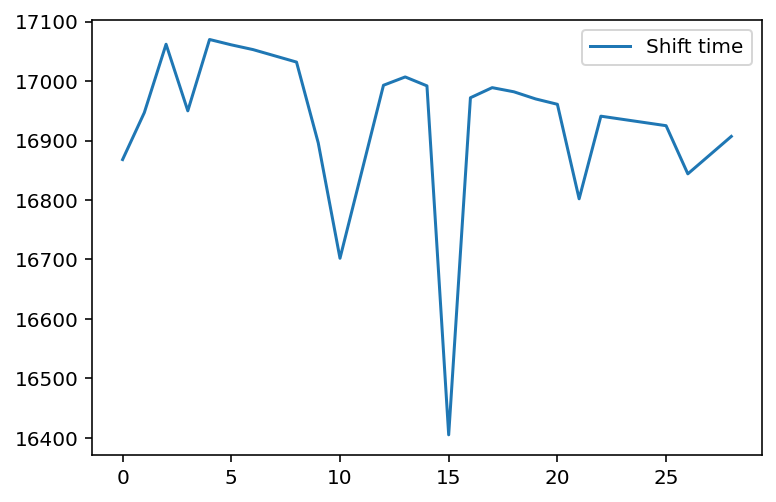

In [820]:
x.loc[x['Shift time'] != -86399].plot()

In [314]:
x.round(3).to_csv('shift_time_maa_april2.txt', sep = '\t', index = False)

In [1056]:
df_ppm = pd.read_csv(f'O:/jmat/MAA0/MAA0_20210410.ppm',
                     header = None,
                     skiprows = 0,
                     sep = '\s+',
                     parse_dates = {'Date': ['date', 'time']},
                     usecols = [1, 2, 3],
                     names = ['date', 'time', 'F'],
                     index_col = 'Date')
df_ppm.loc[df_ppm['F'] >= 99999.0, 'F'] = np.nan
df_ppm.loc[df_ppm['F'] == 00000.00, 'F'] = np.nan

In [619]:
df_ppm

,F
Date,
2021-04-06 00:00:00,26741.88
2021-04-06 00:00:01,26741.88
2021-04-06 00:00:02,26741.88
2021-04-06 00:00:03,26741.88
2021-04-06 00:00:04,26741.88
...,...
2021-04-06 23:59:55,26734.76
2021-04-06 23:59:56,26734.76
2021-04-06 23:59:57,26734.76


In [1057]:
df_sec = pd.read_csv(f'O:/jmat/MAA0/MAA0_20210410.sec',
             header = None,
             skiprows = 0,
             sep = '\s+',
             usecols = [0, 1, 2, 3],
             names = ['time', 'X', 'Y', 'Z'],
             index_col = 'time')
df_sec.loc[df_sec['X'] >= 99999.0, 'X'] = np.nan
df_sec.loc[df_sec['Y'] >= 99999.0, 'Y'] = np.nan
df_sec.loc[df_sec['Z'] >= 99999.0, 'Z'] = np.nan

In [1013]:
df_sec.index[0]

'00:00:00'

In [1058]:
df_sec.index = pd.date_range(f'20210410 {df_sec.index[0]}',f'20210410 {df_sec.index[-1]}', freq = 's')

In [970]:
signal.correlate((df_ppm['F'] - df_ppm['F'].mean()),
                 (df_sec['X'] - df_sec['X'].mean()))

array([nan, nan, nan, ..., nan, nan, nan])

In [517]:
from scipy import signal, fftpack

In [930]:
a = (df_ppm['F'] - df_ppm['F'].mean())
b = (df_sec['X'] - df_sec['X'].mean())

In [929]:
df_ppm = df_ppm.dropna()
df_sec = df_sec.dropna()



In [845]:
df_sec = df_sec.reindex(df_ppm.index)

In [974]:
df_sec.interpolate()

,X,Y,Z
2021-05-12 00:00:00,-105.62,0.87,-103.10
2021-05-12 00:00:01,-105.66,0.88,-103.09
2021-05-12 00:00:02,-105.68,0.89,-103.12
2021-05-12 00:00:03,-105.67,0.89,-103.09
2021-05-12 00:00:04,-105.67,0.88,-103.10
...,...,...,...
2021-05-12 23:59:55,-143.93,-22.00,-101.43
2021-05-12 23:59:56,-143.93,-22.02,-101.43
2021-05-12 23:59:57,-143.95,-21.99,-101.43
2021-05-12 23:59:58,-143.93,-22.00,-101.43


In [1016]:
def cross_correlation_computation(x, y):
    
    if len(x) < len(y):
        y = y.reindex(x.index)
    if len(x) > len(y):
        x = x.reindex(y.index)

    x = x.interpolate()
    y = y.interpolate()   
        
    a = (x - x.mean()) 
    b = (y - y.mean())
    
    #corre_cof = np.corrcoef(a,b)[0, 1]
    
    Z = np.argmax(signal.correlate(a,b))
    lags = correlation_lags(a.size, b.size, mode="full")
    lag = lags[Z]
    print(f"Best lag: {str(timedelta(seconds=float(lag)))}")
    return lag


In [1004]:
df_ppm

,F
Date,
2021-05-13 00:00:00,26683.83
2021-05-13 00:00:01,26683.83
2021-05-13 00:00:02,26683.83
2021-05-13 00:00:03,26683.83
2021-05-13 00:00:04,26683.83
...,...
2021-05-13 23:59:55,NaN
2021-05-13 23:59:56,NaN
2021-05-13 23:59:57,NaN


In [1017]:
cross_correlation_computation(x = df_sec['X'], y = df_ppm['F'])

Best lag: 4:38:08


16688

In [1007]:
df_sec['X'][:'2021-05-13 12:00:00']

2021-05-13 00:00:00   -143.94
2021-05-13 00:00:01   -143.96
2021-05-13 00:00:02   -143.93
2021-05-13 00:00:03   -143.91
2021-05-13 00:00:04       NaN
                        ...  
2021-05-13 11:59:56   -142.09
2021-05-13 11:59:57   -142.11
2021-05-13 11:59:58   -142.15
2021-05-13 11:59:59   -142.11
2021-05-13 12:00:00   -142.09
Freq: S, Name: X, Length: 43201, dtype: float64

<AxesSubplot:xlabel='Date'>

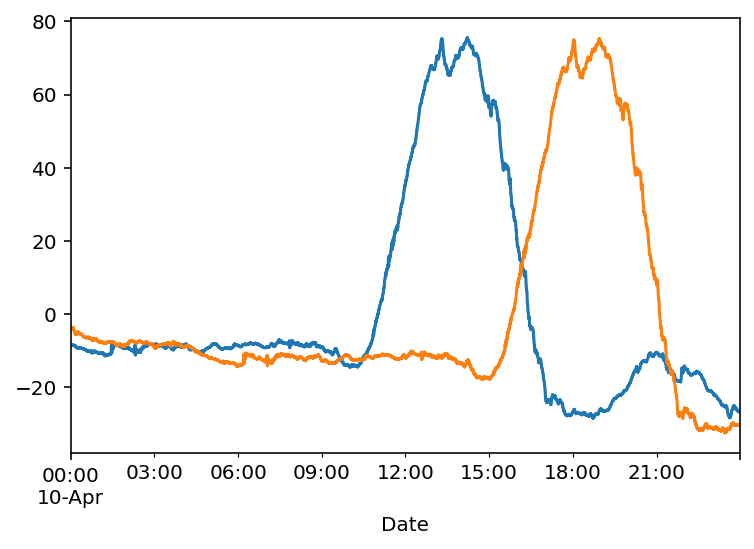

In [1066]:
((df_ppm['F'] - df_ppm['F'].mean()).interpolate()).plot()
((df_sec['X'] - df_sec['X'].mean()).interpolate()).plot()

In [1062]:
(df_ppm['F']).corr(df_sec['X'].shift(14000,'s'))

-0.32809942216498444

In [977]:
str(timedelta(seconds=float(      16976.50)))

'4:42:56.500000'

In [952]:
from scipy.signal import correlate
from scipy.signal import correlation_lags

# Function to calculate cross-correlation,
# extract the best matching shift and then shift
# one of the series appropriately.
def shift_for_maximum_correlation(x, y):
    correlation = correlate(x, y, mode="full")
    lags = correlation_lags(x.size, y.size, mode="full")
    lag = lags[np.argmax(correlation)]
    print(f"Best lag: {lag}")
    if lag < 0:
        y = y.iloc[abs(lag):].reset_index(drop=True)
    else:
        x = x.iloc[lag:].reset_index(drop=True)
    return x, y

# Plot results after shifting
#for x, y in shifted_versions:
#    shifted_x, shifted_y = shift_for_maximum_correlation(x, y)
#    plot_correlation(shifted_x, shifted_y, text="after shifting")

In [1005]:
x,y = shift_for_maximum_correlation((df_ppm['F'] - df_ppm['F'].mean()),
                                    (df_sec['X'] - df_sec['X'].mean())
                                   )


Best lag: -86399


In [983]:
df_sec.interpolate()

,X,Y,Z
2021-05-12 00:00:00,-105.62,0.87,-103.10
2021-05-12 00:00:01,-105.66,0.88,-103.09
2021-05-12 00:00:02,-105.68,0.89,-103.12
2021-05-12 00:00:03,-105.67,0.89,-103.09
2021-05-12 00:00:04,-105.67,0.88,-103.10
...,...,...,...
2021-05-12 23:59:55,-143.93,-22.00,-101.43
2021-05-12 23:59:56,-143.93,-22.02,-101.43
2021-05-12 23:59:57,-143.95,-21.99,-101.43
2021-05-12 23:59:58,-143.93,-22.00,-101.43


In [984]:
df_ppm

,F
Date,
2021-05-12 00:00:00,26724.90
2021-05-12 00:00:01,26724.90
2021-05-12 00:00:02,26724.90
2021-05-12 00:00:03,26724.90
2021-05-12 00:00:04,26724.90
...,...
2021-05-12 23:59:55,26683.81
2021-05-12 23:59:56,26683.81
2021-05-12 23:59:57,26683.81


<AxesSubplot:xlabel='Date'>

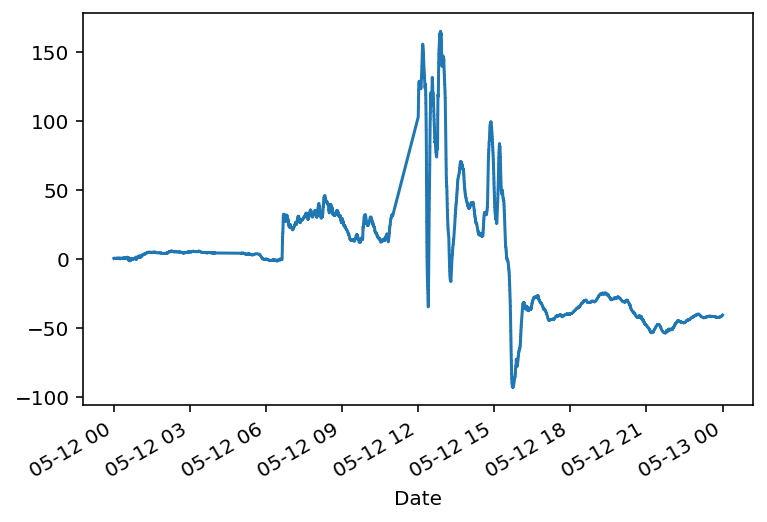

In [956]:
(df_ppm['F'] - df_ppm['F'].mean()).plot()

TypeError: index type not supported

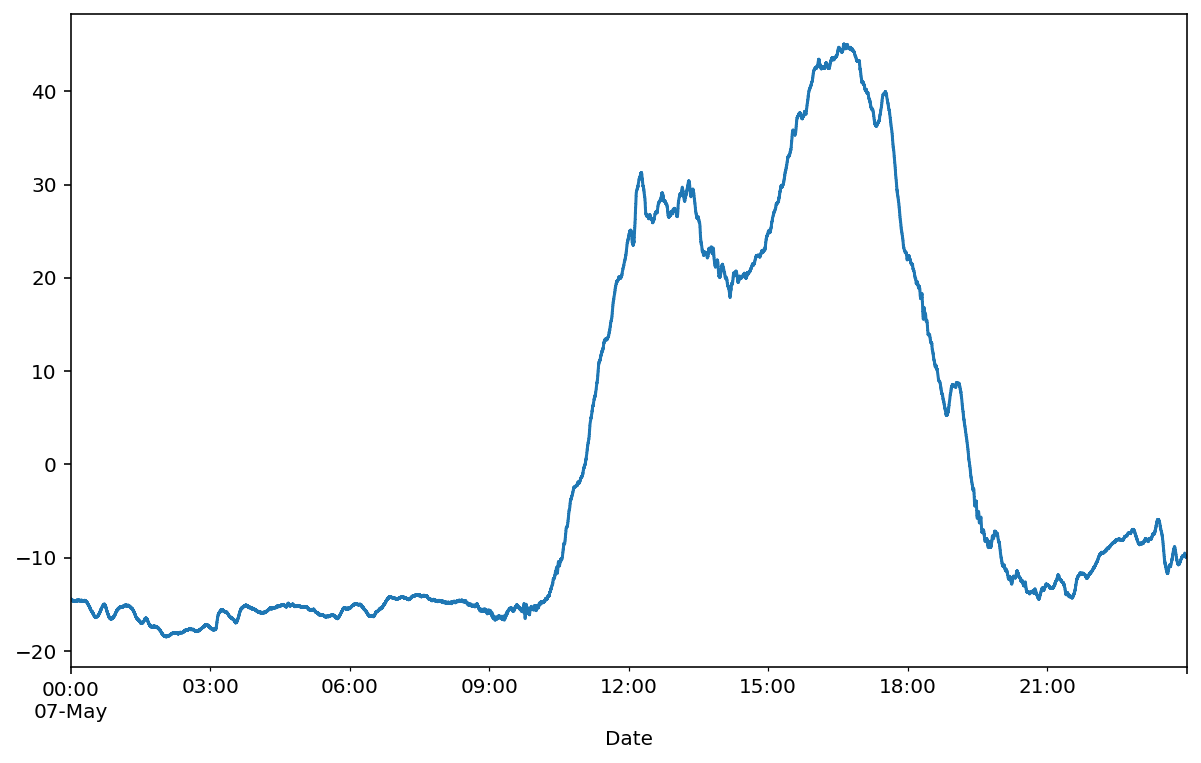

In [485]:
def plot_correlation(x, y, text):
    # plot 
    plt.subplots(figsize=(10, 6))
    x.plot(label="x")
    y.plot(label="y")
    plt.title(f"Correlation {text}: {correlation(x, y)}")
    plt.legend(loc="best")
    plt.show()

plot_correlation(x,y, "before shifting")

In [602]:
def correlation(x, y):
    shortest = min(x.shape[0], y.shape[0])
    return np.corrcoef(x.iloc[:shortest].values, y.iloc[:shortest].values)[0, 1]

In [603]:
correlation((df_ppm['F']),
            (df_sec['X']))

-0.3827402161415281

In [604]:
shortest = min(obs_x.shape[0], obs_f.shape[0])

In [606]:
obs_x.iloc[:shortest]

Date
2021-04-16 00:00:00    -2.86602
2021-04-16 00:00:01    -2.85602
2021-04-16 00:00:02    -2.83602
2021-04-16 00:00:03    -2.82602
2021-04-16 00:00:04    -2.81602
                         ...   
2021-04-16 19:17:55   -76.20602
2021-04-16 19:17:56   -76.22602
2021-04-16 19:17:57   -76.24602
2021-04-16 19:17:58   -76.23602
2021-04-16 19:17:59   -76.25602
Name: X, Length: 69480, dtype: float64

In [78]:
df_station = pd.concat( (pd.read_csv(file, sep='\s+',usecols = [0,1,3,4,5,6], 
               header = None,skiprows = 25, 
               parse_dates = {'Date': ['date', 'Time']},
               names = ['date','Time','X','Y','Z','F']) for file in files_station), 
               ignore_index = True)
df_station['Date'] = pd.to_datetime(df_station['Date'], format = '%Y-%m-%dd %H:%M:%S.%f')     
#df_station['Hour'] = pd.to_datetime(df_station['Hour'], format = '%H:%M:%S.%f').dt.time               
df_station.set_index('Date', inplace = True)


df_station.loc[df_station['X'] == 99999.0, 'X'] = np.nan
df_station.loc[df_station['Y'] == 99999.0, 'Y'] = np.nan
df_station.loc[df_station['Z'] == 99999.0, 'Z'] = np.nan 
df_station.loc[df_station['F'] == 88888.0, 'F'] = np.nan 

In [79]:
df_KOU = df_station

In [7]:
df_TTB = mvs.load_intermagnet_files('TTB','2010-01-01','2022-02-28')

Reading files from TTB...


In [8]:
df_KOU = mvs.load_intermagnet_files('KOU','2010-01-01','2022-02-28')

Reading files from KOU...


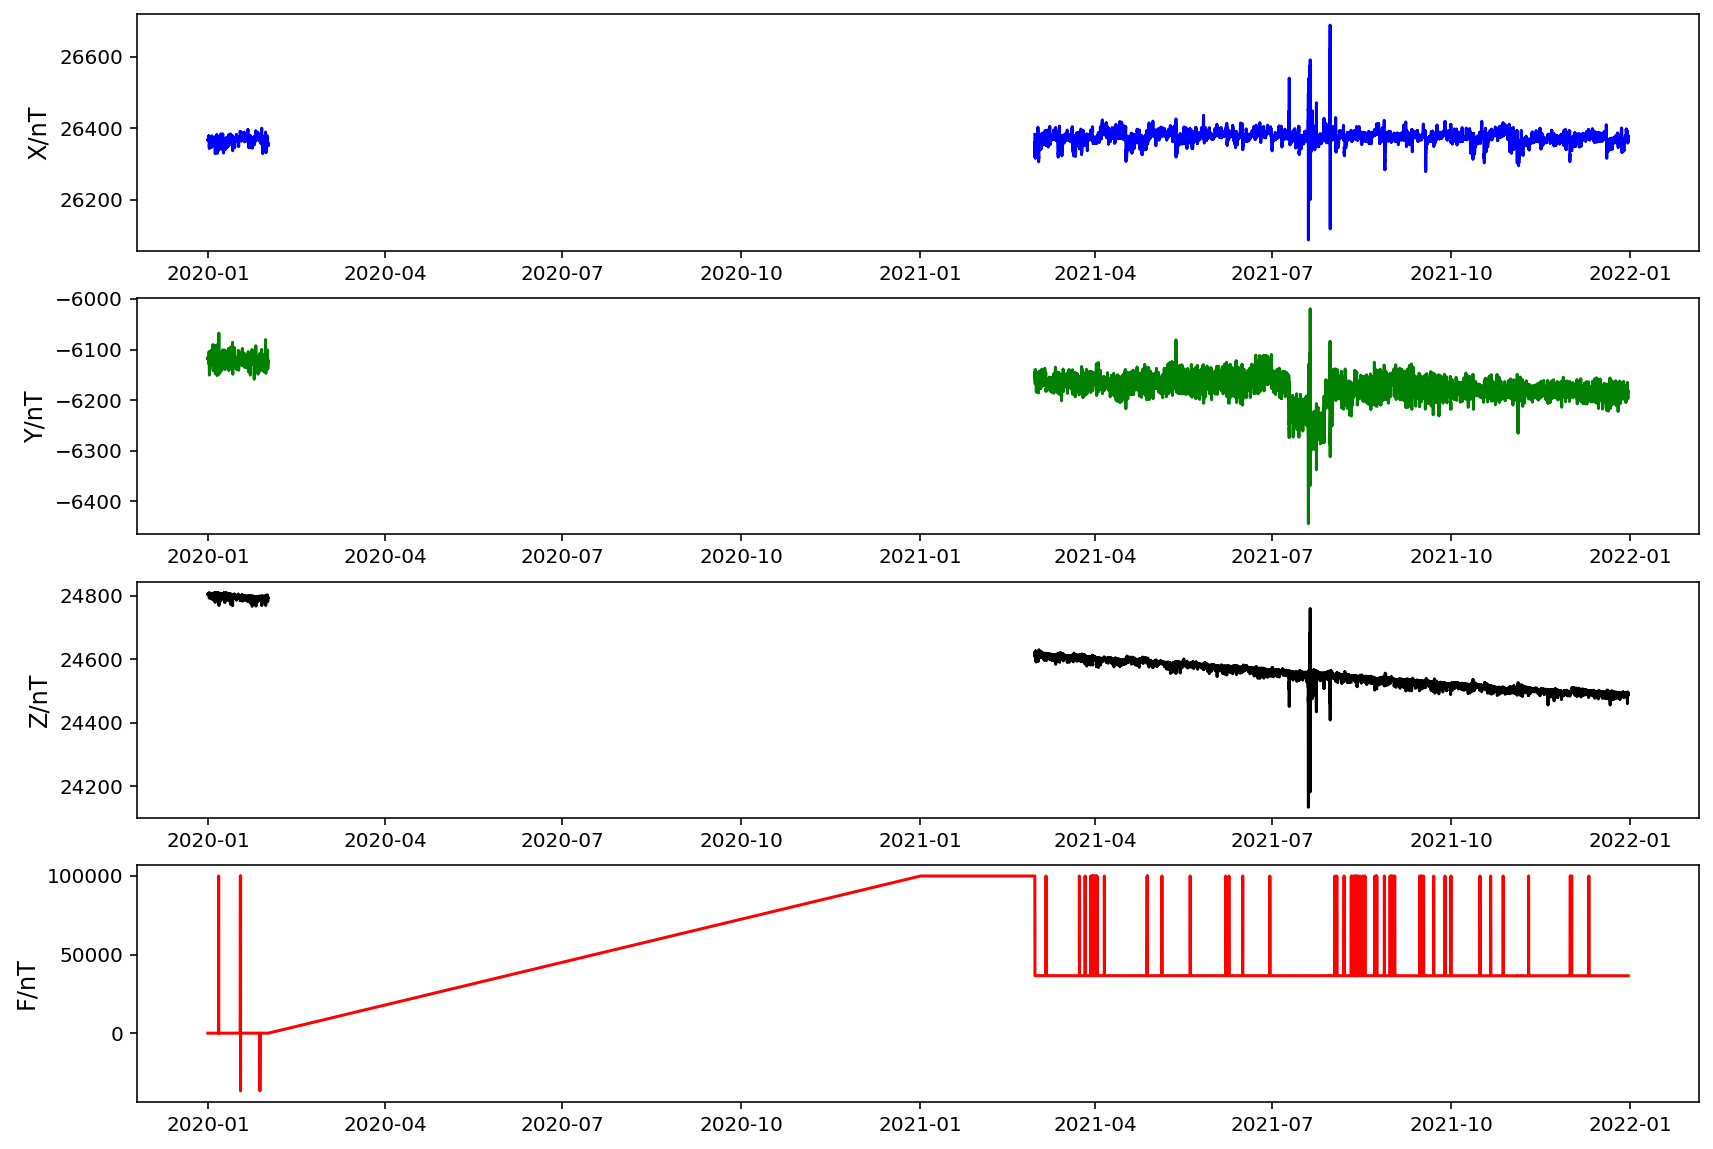

In [6]:
df_SJG = obs.obs_data_processing(station = 'sjg',path = 'MAA0/sjg', starttime = None,
                        endtime = None, sample = None, plots = True)

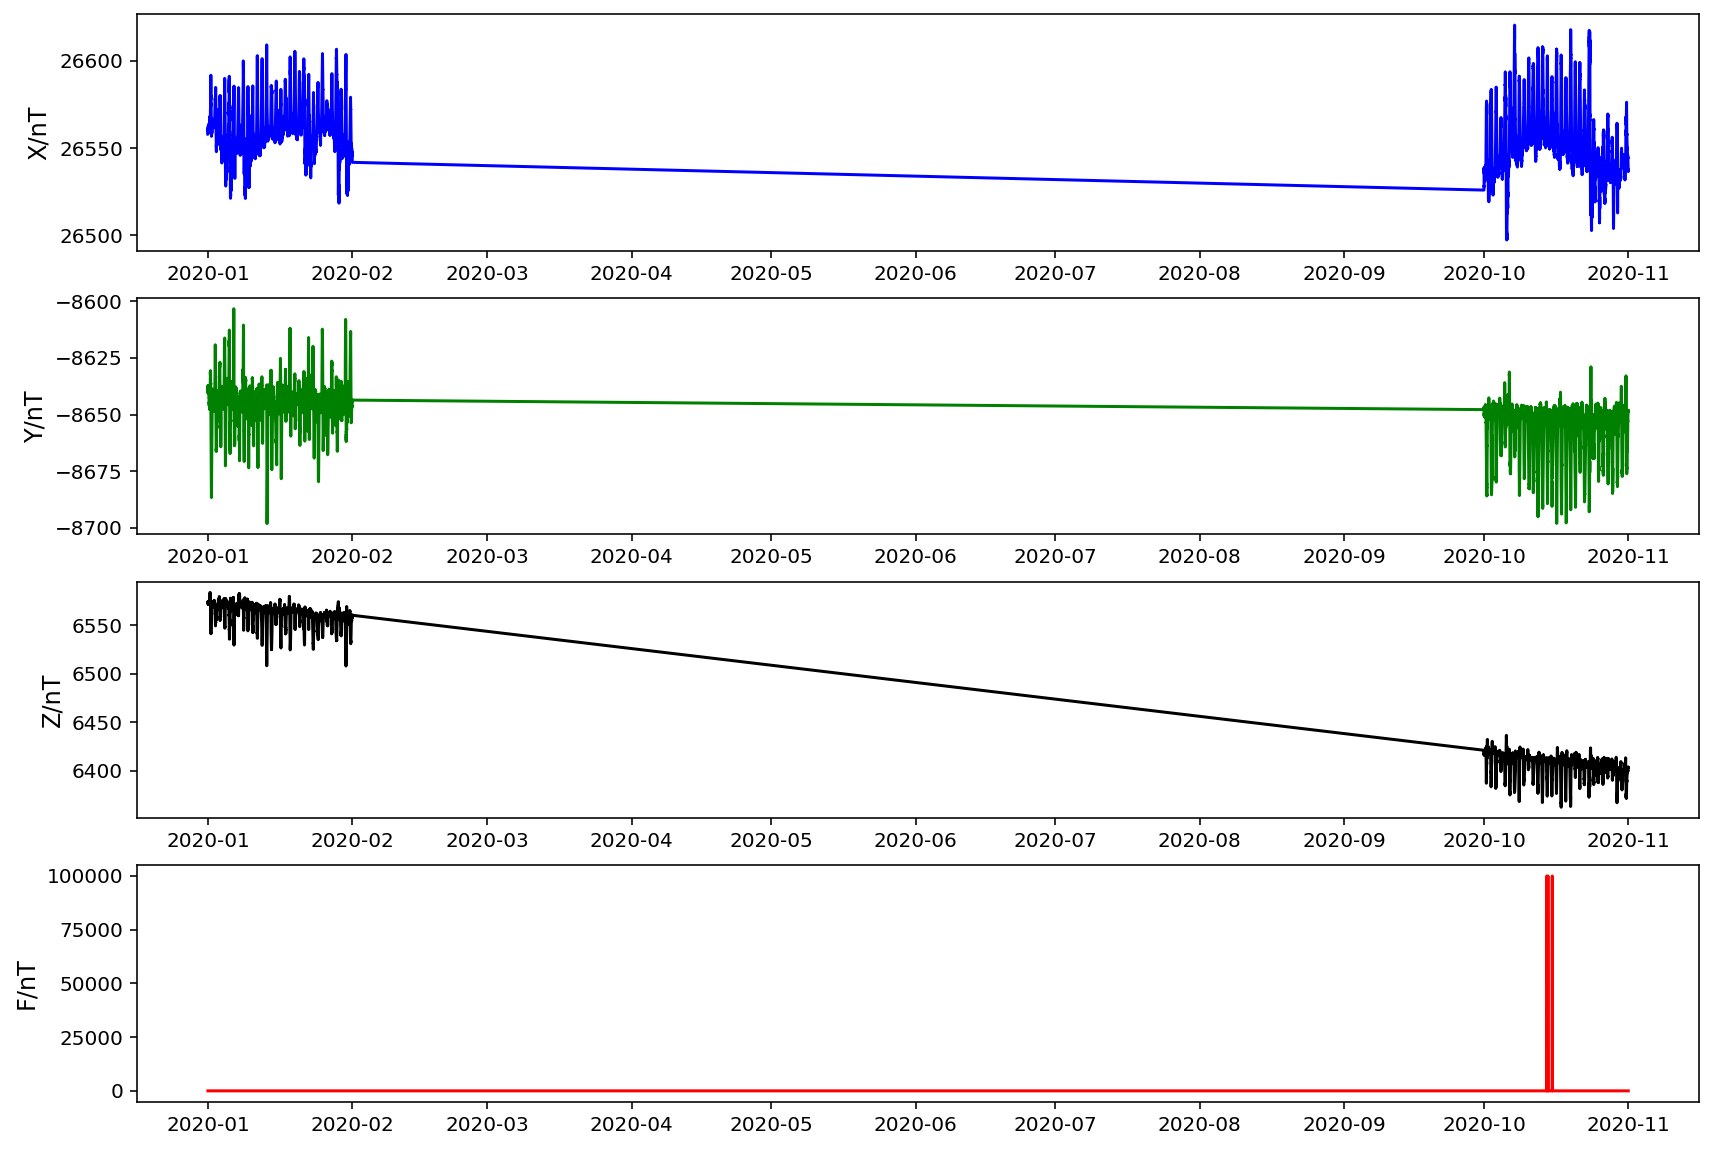

In [6]:
df_KOU = obs.obs_data_processing(station = 'KOU',path = 'MAA0/KOU', starttime = None,
                        endtime = None, sample = None, plots = True)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

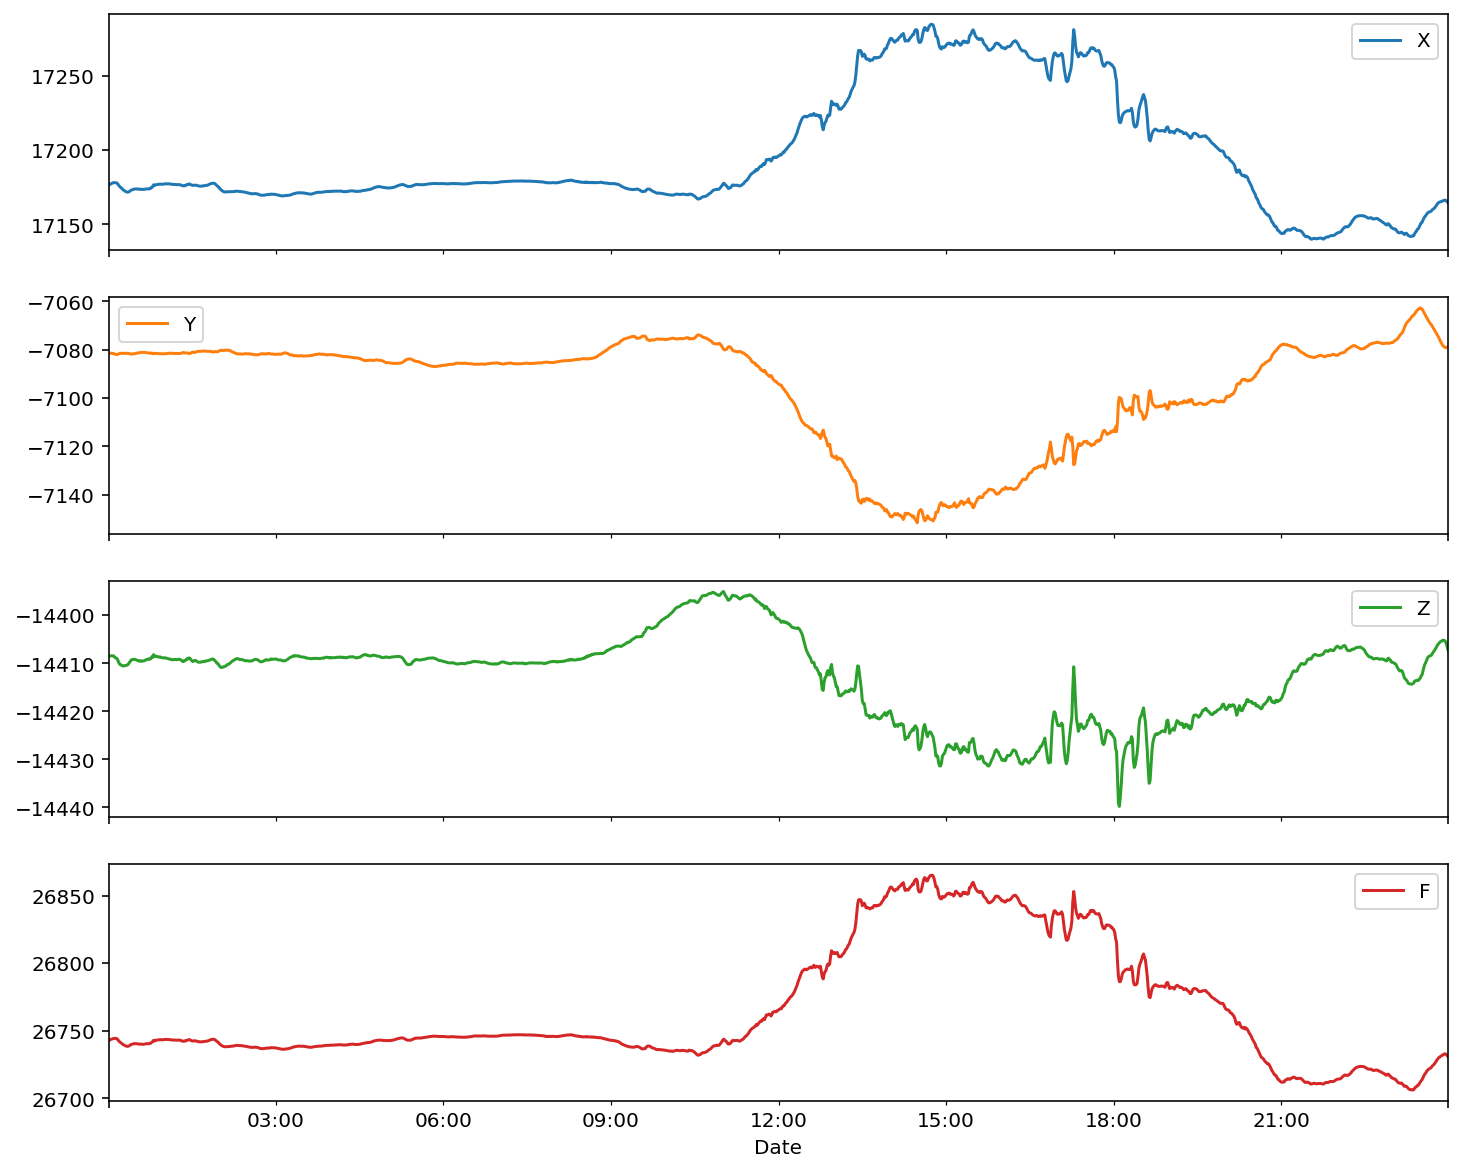

In [8]:
df_MAA.loc['2020-10-23'].plot(subplots = True, figsize = (12,10))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

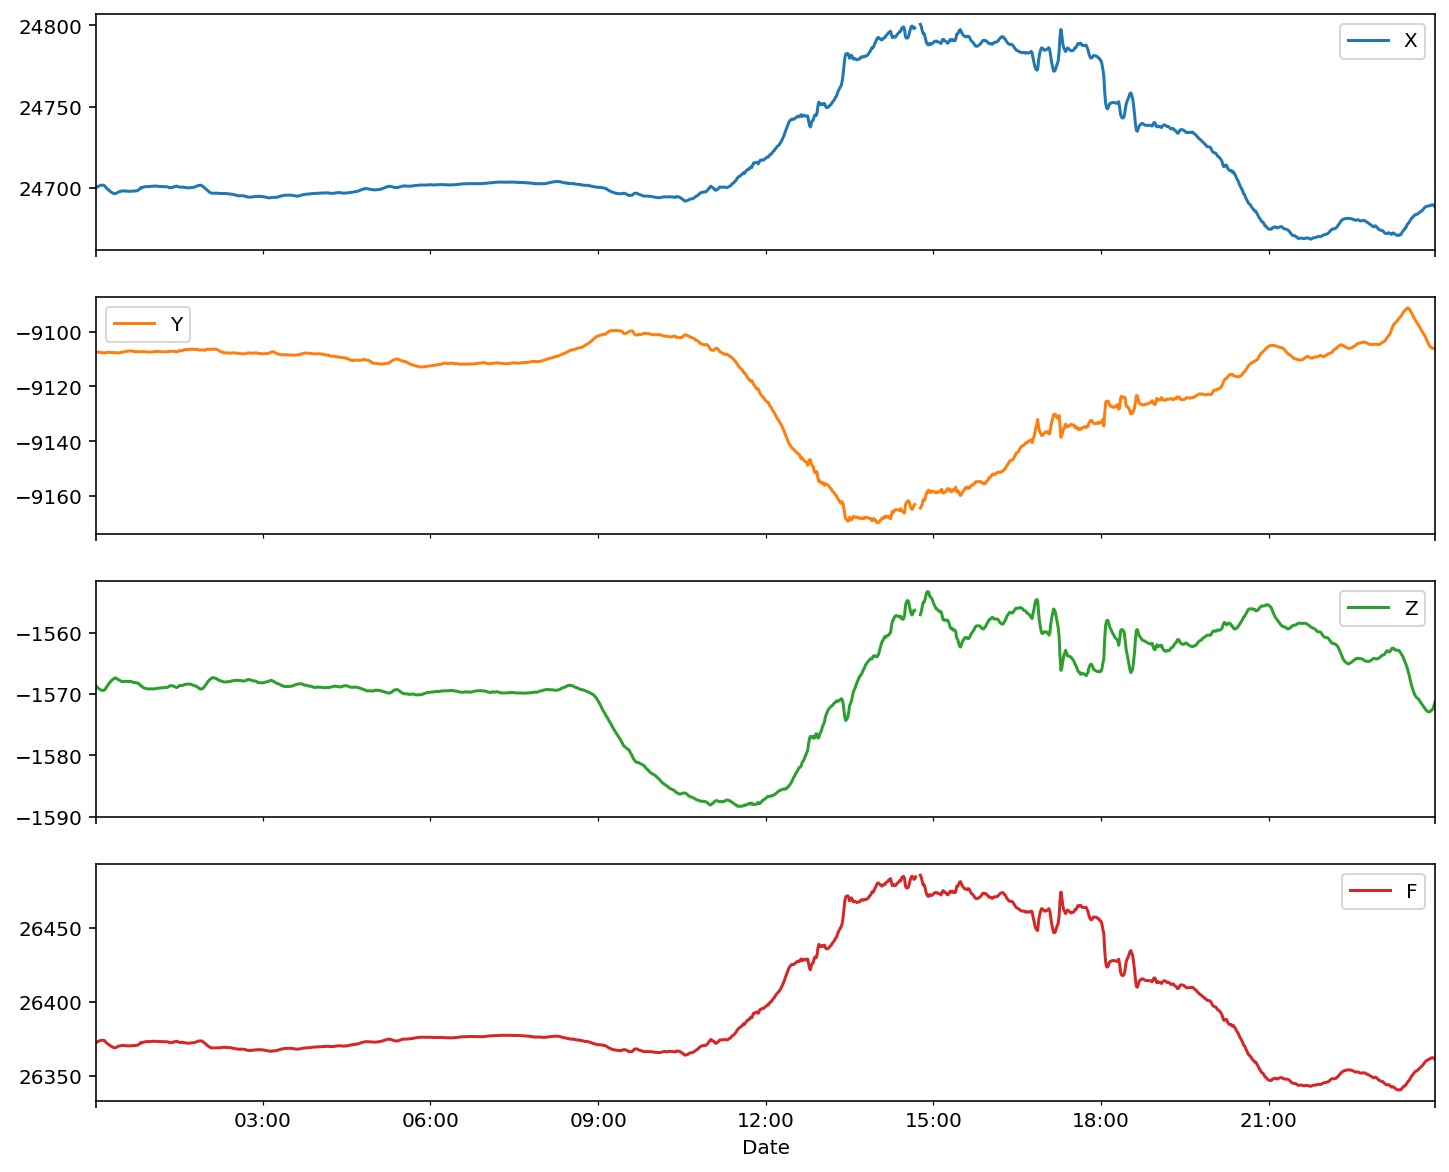

In [9]:
df_TTB.loc['2020-10-23'].plot(subplots = True, figsize = (12,10))

C:\Users\marco\AppData\Local\Temp\ipykernel_16544\1214063370.py:11: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  plt.xlim(np.datetime64('2020-01-14 00:00'),np.datetime64('2020-01-15 00:00 '))


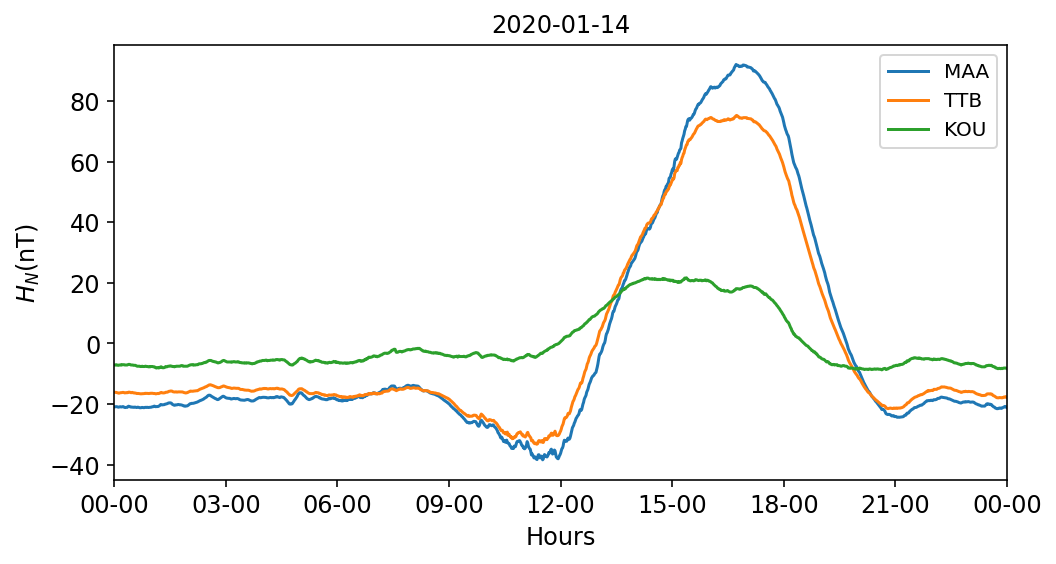

In [9]:
fig, ax = plt.subplots(1,1,figsize = (8,4))

plt.plot(df_MAA['X']['2020-01-14'] - df_MAA['X']['2020-01-14'].mean(),label = 'MAA')
plt.plot(df_TTB['X']['2020-01-14'] - df_TTB['X']['2020-01-14'].mean(), label = 'TTB')
plt.plot(df_KOU['X']['2020-01-14'] - df_KOU['X']['2020-01-14'].mean(),label = 'KOU')

#plt.plot((df_TTB['H']['2022-05-23'] - df_TTB['H']['2022-05-23'].mean())- (df_KOU['H']['2022-05-23'] - df_KOU['H']['2022-05-23'].mean()),label = 'TTB - KOU', color = 'red')
plt.ylabel('$H_N$(nT)', fontsize = 12)
plt.xlabel('Hours', fontsize = 12)

plt.xlim(np.datetime64('2020-01-14 00:00'),np.datetime64('2020-01-15 00:00 '))
plt.legend()
#plt.gcf().text(0.035, 0.08, "20-01-13", fontsize = 10)
plt.title('2020-01-14')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))
plt.tick_params(axis='both', which='major', labelsize=12)
#ax[1].tick_params(axis='both', which='major', labelsize=16)

#plt.grid()
#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[0] = '2020-01-13 00-00'
#
#ax.set_xticklabels(labels)
#plt.xlabel('Time')
plt.savefig('fig2_sqcomparison.jpeg', bbox_inches='tight', dpi = 1000)



plt.show()

In [100]:
df_TTB['H'] = np.sqrt(df_TTB['X']**2 + df_TTB['Y']**2)

In [101]:
df_KOU['H'] = np.sqrt(df_KOU['X']**2 + df_KOU['Y']**2)

In [105]:
4**2

16

C:\Users\marco\AppData\Local\Temp\ipykernel_16544\4038789952.py:63: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ax[0].set_xlim(np.datetime64('2020-01-09 00:00'),np.datetime64('2020-01-15 00:00 '))
C:\Users\marco\AppData\Local\Temp\ipykernel_16544\4038789952.py:64: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ax[1].set_xlim(np.datetime64('2020-01-09 00:00'),np.datetime64('2020-01-15 00:00 '))
C:\Users\marco\AppData\Local\Temp\ipykernel_16544\4038789952.py:65: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ax[2].set_xlim(np.datetime64('2020-01-09 00:00'),np.datetime64('2020-01-15 00:00 '))
C:\Users\marco\AppData\Local\Temp\ipykernel_16544\4038789952.py:66: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ax[3].set_xlim(np.datetime64('2020-01

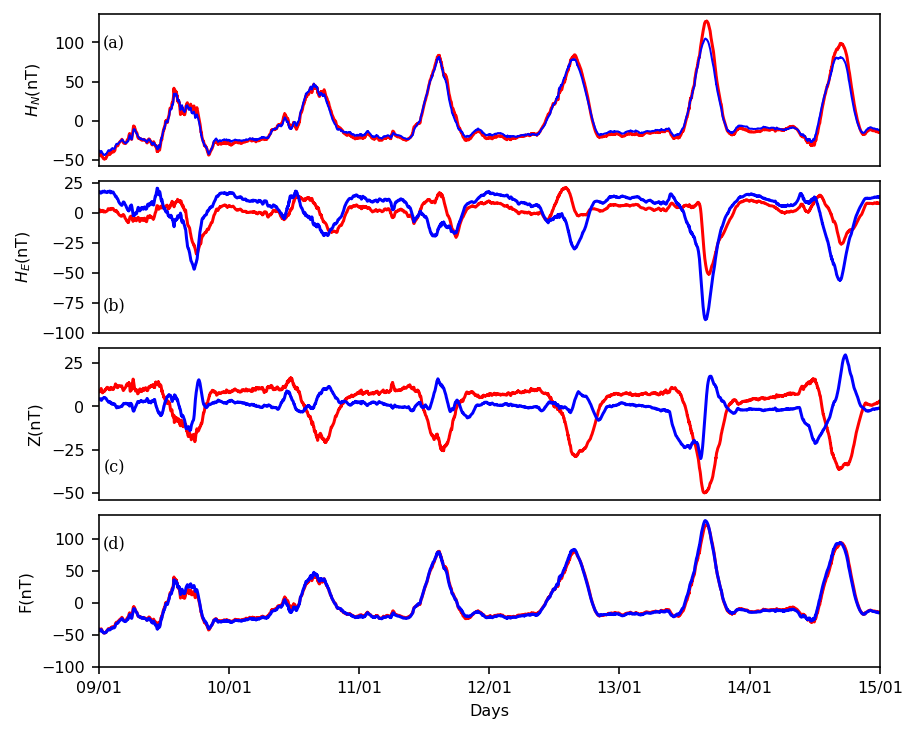

In [60]:
fig, ax = plt.subplots(4,1,figsize = (7,6),sharex=True, constrained_layout=True)
ax[0].plot((df_MAA['X']['2020-01-09':'2020-01-15'] - df_MAA['X']['2020-01-09':'2020-01-15'].mean()), label = 'MAA',color = 'red')
ax[0].plot(df_TTB['X']['2020-01-09':'2020-01-15'] - df_TTB['X']['2020-01-09':'2020-01-15'].mean(),
       
     linewidth=1,label = 'TTB', color = 'blue')

ax[1].plot((df_MAA['Y']['2020-01-09':'2020-01-15'] - df_MAA['Y']['2020-01-09':'2020-01-15'].mean()), label = 'MAA',color = 'red')
ax[1].plot(df_TTB['Y']['2020-01-09':'2020-01-15'] - df_TTB['Y']['2020-01-09':'2020-01-15'].mean(),label = 'TTB', color = 'blue')

ax[2].plot((df_MAA['Z']['2020-01-09':'2020-01-15'] - df_MAA['Z']['2020-01-09':'2020-01-15'].mean()), label = 'MAA',color = 'red')
ax[2].plot(df_TTB['Z']['2020-01-09':'2020-01-15'] - df_TTB['Z']['2020-01-09':'2020-01-15'].mean(),label = 'TTB', color = 'blue')

ax[3].plot((df_MAA['Fsc']['2020-01-09':'2020-01-15'] - df_MAA['Fsc']['2020-01-09':'2020-01-15'].mean()), label = 'MAA',color = 'red')
ax[3].plot(df_TTB['F']['2020-01-09':'2020-01-15'] - df_TTB['F']['2020-01-09':'2020-01-15'].mean(),label = 'TTB', color = 'blue')

#ax[4].plot((df_MAA['X']['2020-01-09':'2020-01-15'] - df_MAA['X']['2020-01-09':'2020-01-15'].mean())  - (df_MAA['F']['2020-01-09':'2020-01-15']- df_MAA['F']['2020-01-09':'2020-01-15'].mean()), label = 'MAA', color = 'red')
#ax[4].plot(df_TTB['X']['2020-01-09':'2020-01-18'] - df_TTB['X']['2020-01-09':'2020-01-18'].mean(),label = 'TTB')


ax[0].set_ylabel('$H_N$(nT)', fontsize = 8)
ax[1].set_ylabel('$H_E$(nT)', fontsize = 8)
ax[2].set_ylabel('Z(nT)', fontsize = 8)
ax[3].set_ylabel('F(nT)', fontsize = 8)
#ax[4].set_ylabel('$H_N$ - F(nT)', fontsize = 12)
ax[3].set_xlabel('Days', fontsize = 8)

#ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax[1].legend()
#ax[2].legend()
#ax[3].legend()
#ax[4].legend()

ax[0].tick_params(axis='x', which='both',
                bottom=False)
ax[0].set_yticks(np.arange(-50,101,50))
ax[1].set_yticks(np.arange(-100,50,25))
ax[2].set_yticks(np.arange(-50,50,25))
ax[3].set_yticks(np.arange(-100,101,50))


ax[1].tick_params(axis='x', which='both',
                bottom=False) 

ax[0].tick_params(axis='both', which='major', labelsize=8)
ax[1].tick_params(axis='both', which='major', labelsize=8)
ax[2].tick_params(axis='both', which='major', labelsize=8)
ax[3].tick_params(axis='both', which='major', labelsize=8)


ax[2].tick_params(axis='x', which='both',
                bottom=False) 
ax[3].tick_params(axis='x', which='both',
                bottom=True) 


ax[0].set_title('(a)', fontfamily='serif',  x=0.02, y=0.70, fontsize=8)
ax[1].set_title('(b)', fontfamily='serif',  x=0.02, y=0.07, fontsize=8)
ax[2].set_title('(c)', fontfamily='serif',  x=0.02, y=0.1, fontsize=8)
ax[3].set_title('(d)', fontfamily='serif',  x=0.02, y=0.70, fontsize=8)
#ax[4].set_title('(e)', fontfamily='serif',  x=0.02, y=0.09, fontsize=12)


ax[0].set_xlim(np.datetime64('2020-01-09 00:00'),np.datetime64('2020-01-15 00:00 '))
ax[1].set_xlim(np.datetime64('2020-01-09 00:00'),np.datetime64('2020-01-15 00:00 '))
ax[2].set_xlim(np.datetime64('2020-01-09 00:00'),np.datetime64('2020-01-15 00:00 '))
ax[3].set_xlim(np.datetime64('2020-01-09 00:00'),np.datetime64('2020-01-15 00:00 '))
#ax[4].set_xlim(np.datetime64('2020-01-09 00:00'),np.datetime64('2020-01-15 00:00 '))
#plt.legend()
#plt.gcf().text(0.035, 0.08, "20-01-13", fontsize = 10)

#ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax[3].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
#ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax[3].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
#plt.grid()
#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[0] = '2020-01-13 00-00'
#
#ax.set_xticklabels(labels)
#plt.xlabel('Time')

plt.subplots_adjust(wspace=0.0, hspace=0.1)
plt.savefig('new_figs_maa/fig7_7dayscomparison.jpeg', bbox_inches='tight', dpi = 1000)
#plt.grid()

plt.show()

<AxesSubplot:xlabel='Date'>

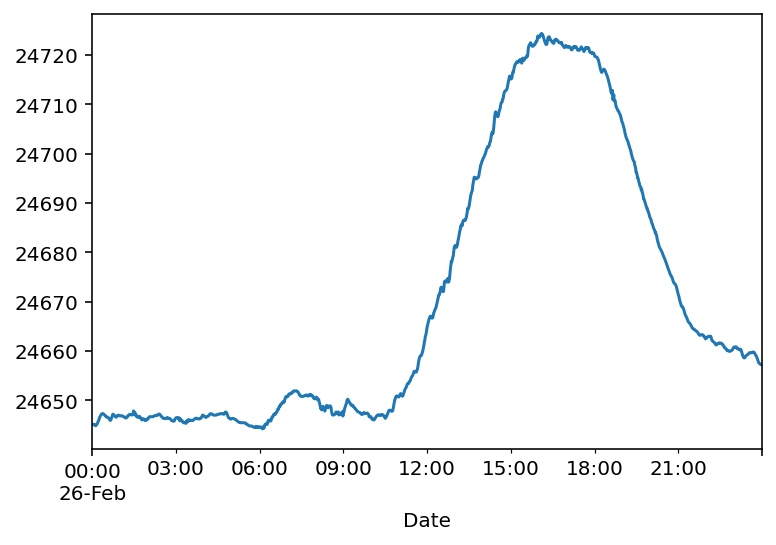

In [52]:
df_TTB['X']['2022-02-26'].plot()

<AxesSubplot:xlabel='Date'>

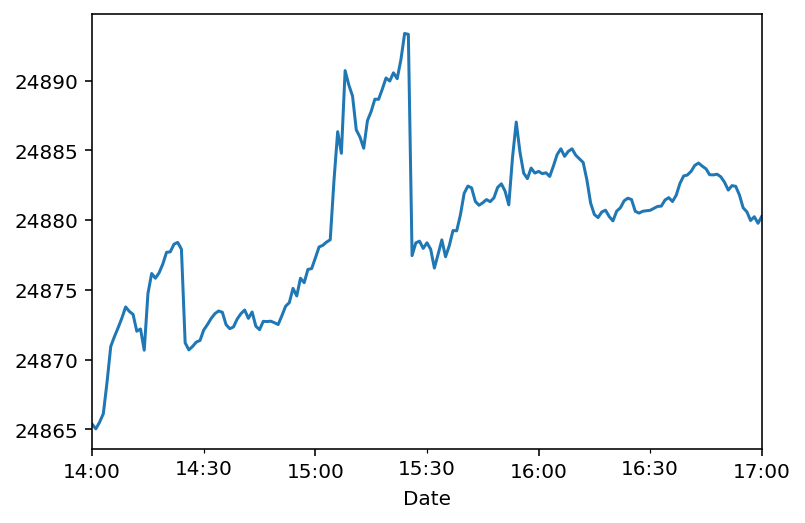

In [7]:
df_MAA['X'].loc['2020-01-17 14:00':'2020-01-17 17:00' ].plot()

<AxesSubplot:xlabel='Date'>

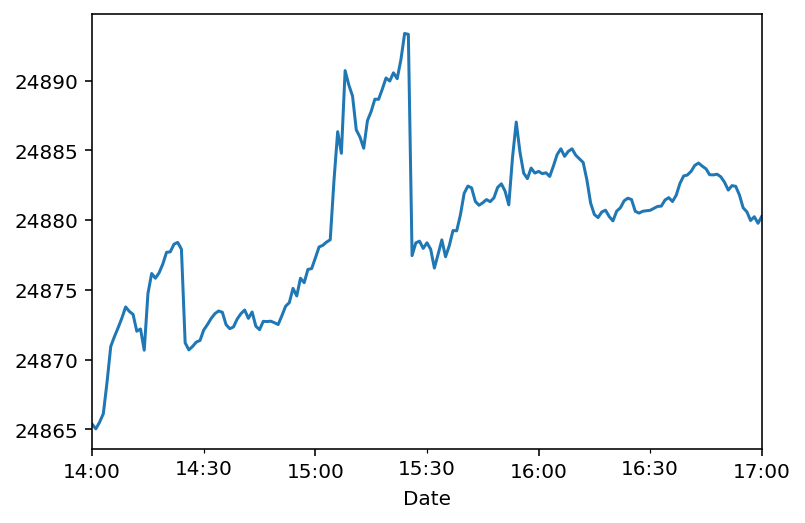

In [13]:
df_MAA['X'].loc['2020-01-17 14:00':'2020-01-17 17:00' ].plot()

<AxesSubplot:xlabel='Date'>

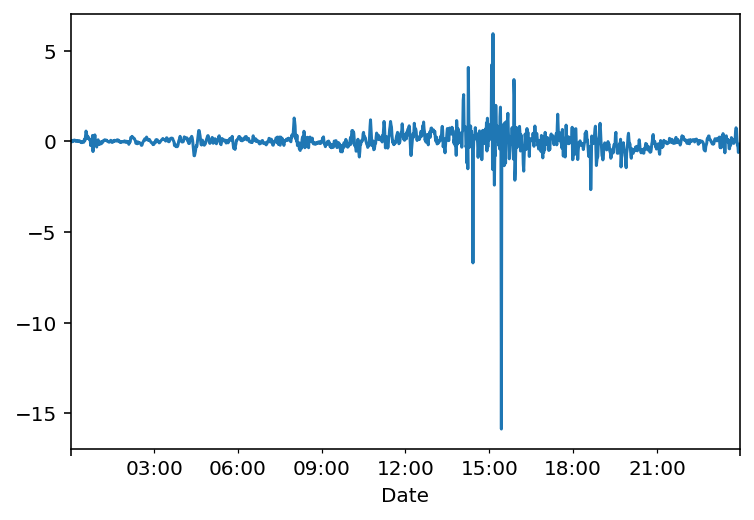

In [14]:
df_MAA['X'].loc['2020-01-17':'2020-01-17' ].diff().plot()

C:\Users\marco\AppData\Local\Temp\ipykernel_16544\615685985.py:17: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ax.set_xlim(np.datetime64('2020-10-23 00:00'),np.datetime64('2020-10-24 00:00 '))


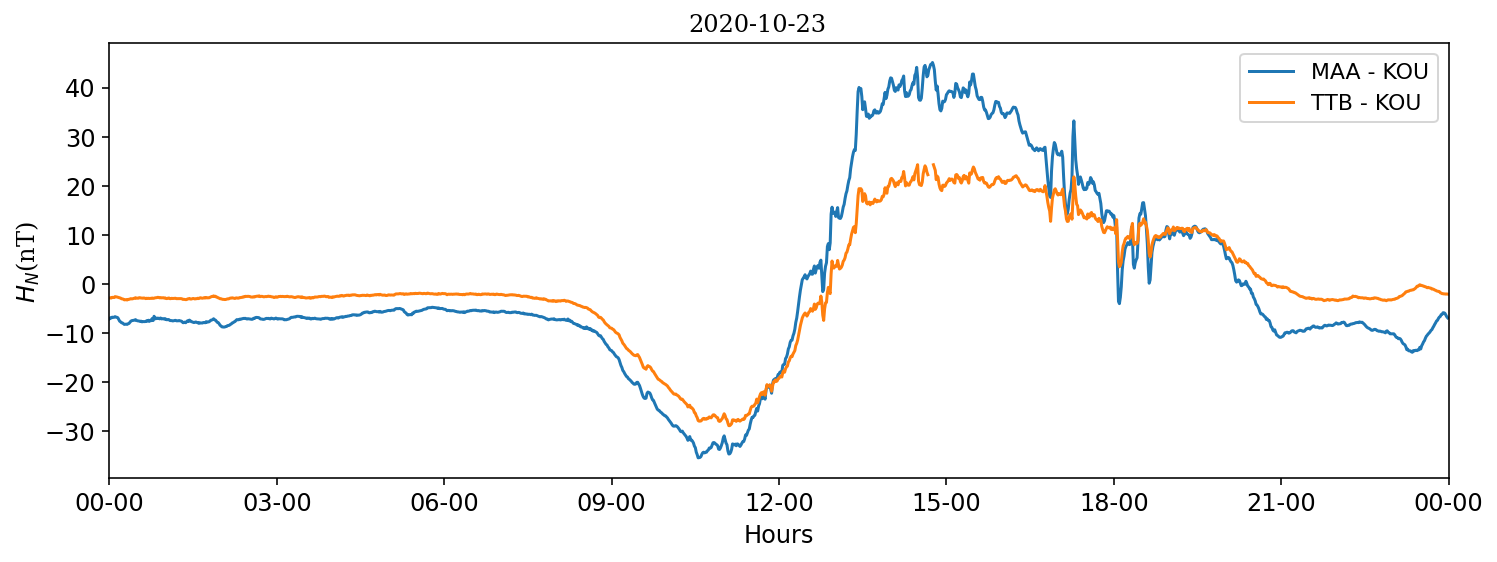

In [44]:
fig, ax = plt.subplots(1,1, figsize = (12,4),sharex=True, sharey=True)

ax.plot((df_MAA['X'].loc['2020-10-23'] - df_MAA['X'].loc['2020-10-23'].mean()) - (df_KOU['X'].loc['2020-10-23']-df_KOU['X'].loc['2020-10-23'].mean()), label = 'MAA - KOU')
ax.plot((df_TTB['X'].loc['2020-10-23'] - df_TTB['X'].loc['2020-10-23'].mean()) - (df_KOU['X'].loc['2020-10-23']-df_KOU['X'].loc['2020-10-23'].mean()), label = 'TTB - KOU')


#ax[0].set_ylabel('$H_N$(nT)', fontsize = 12)

#ax[1].plot((df_TTB['X'].loc['2020-10-23'] - df_TTB['X'].loc['2020-10-23'].mean()) - (df_KOU['X'].loc['2020-10-23']-df_KOU['X'].loc['2020-10-23'].mean()),label = 'TTB - KOU')

#ax[2].plot((df_MAA['X'].loc['2020-10-23'] - df_MAA['X'].loc['2020-10-23'].mean()) - (df_TTB['X'].loc['2020-10-23']-df_TTB['X'].loc['2020-10-23'].mean()),label = 'MAA - TTB')

ax.legend(prop={'size': 11})
#ax[1].legend()
#ax[2].legend()

ax.set_xlim(np.datetime64('2020-10-23 00:00'),np.datetime64('2020-10-24 00:00 '))
#ax[1].set_xlim(np.datetime64('2020-10-23 00:00'),np.datetime64('2020-10-24 00:00 '))
#ax[2].set_xlim(np.datetime64('2020-10-23 00:00'),np.datetime64('2020-10-24 00:00 '))

#ax.set_title('(a)', fontfamily='serif',  x=0.02, y=0.85, fontsize=12)
#ax[1].set_title('(b)', fontfamily='serif',  x=0.02, y=0.85, fontsize=12)
#ax[2].set_title('(c)', fontfamily='serif',  x=0.02, y=0.85, fontsize=12)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Hours', fontsize = 12)
plt.subplots_adjust(wspace=0.0, hspace=0.05)
#ax[0].set_title('2020-10-23',fontsize = 12)

fig.text(0.07, 0.5, '$H_N$(nT)', va='center', rotation='vertical', fontsize = 12, fontfamily='serif')


fig.suptitle("2020-10-23",fontsize = 12,y = 0.93, fontfamily='serif')

plt.savefig('new_figs_maa/fig9_MAA_TTB_KOU_diff.jpeg', bbox_inches='tight', dpi = 1000)
plt.show()

C:\Users\marco\AppData\Local\Temp\ipykernel_16544\2035856761.py:21: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ax[0].set_xlim(np.datetime64('2020-01-17 00:00'),np.datetime64('2020-01-18 00:00 '))
C:\Users\marco\AppData\Local\Temp\ipykernel_16544\2035856761.py:22: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ax[1].set_xlim(np.datetime64('2020-01-17 00:00'),np.datetime64('2020-01-18 00:00 '))


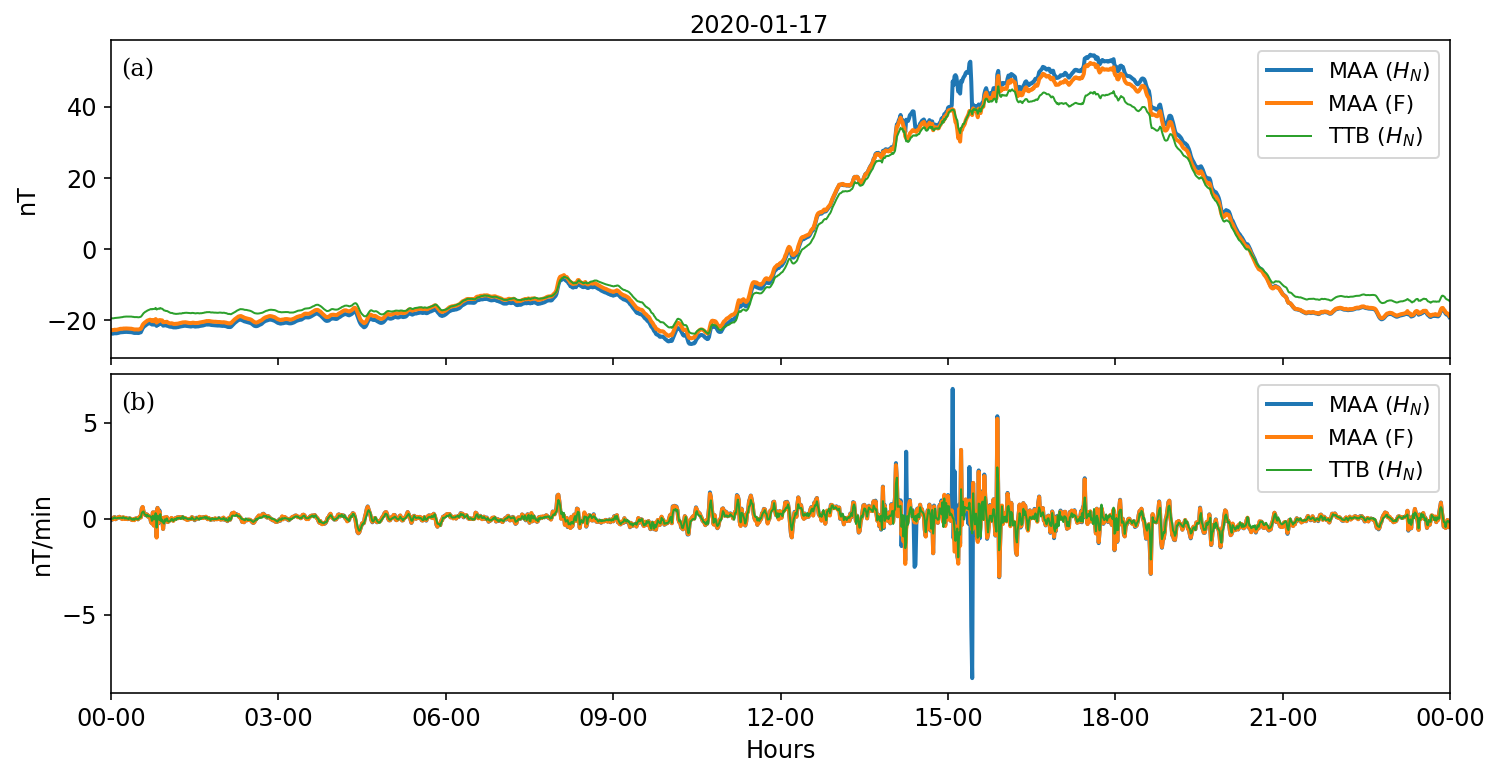

In [35]:
fig, ax = plt.subplots(2,1, figsize = (12,6),sharex=True)

ax[0].plot(df_MAA['X'].loc['2020-01-17'] - df_MAA['X'].loc['2020-01-17'].mean(),linewidth = 2, label = 'MAA ($H_N$)')
ax[0].plot(df_MAA['Fsc'].loc['2020-01-17'] - df_MAA['Fsc'].loc['2020-01-17'].mean(),linewidth = 2, label = 'MAA (F)')
ax[0].plot(df_TTB['X'].loc['2020-01-17'] - df_TTB['X'].loc['2020-01-17'].mean(),linewidth = 1,label = 'TTB ($H_N$)')



#ax[0].set_ylabel('$H_N$(nT)', fontsize = 12)

ax[1].plot(df_MAA['X'].loc['2020-01-17'].diff(), linewidth = 2, label = 'MAA ($H_N$)')
ax[1].plot(df_MAA['Fsc'].loc['2020-01-17'].diff(),linewidth = 2, label = 'MAA (F)')
ax[1].plot(df_TTB['X'].loc['2020-01-17'].diff(), linewidth = 1, label = 'TTB ($H_N$)')

#ax[2].plot((df_MAA['X'].loc['2020-10-23'] - df_MAA['X'].loc['2020-10-23'].mean()) - (df_TTB['X'].loc['2020-10-23']-df_TTB['X'].loc['2020-10-23'].mean()),label = 'MAA - TTB')

ax[0].legend(prop={'size': 11})
ax[1].legend(prop={'size': 11})
#ax[2].legend()

ax[0].set_xlim(np.datetime64('2020-01-17 00:00'),np.datetime64('2020-01-18 00:00 '))
ax[1].set_xlim(np.datetime64('2020-01-17 00:00'),np.datetime64('2020-01-18 00:00 '))
#ax[2].set_xlim(np.datetime64('2020-10-23 00:00'),np.datetime64('2020-10-24 00:00 '))

ax[0].set_title('(a)', fontfamily='serif',  x=0.02, y=0.85, fontsize=12)
ax[1].set_title('(b)', fontfamily='serif',  x=0.02, y=0.85, fontsize=12)
#ax[2].set_title('(c)', fontfamily='serif',  x=0.02, y=0.85, fontsize=12)

ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%H-%M'))
ax[0].set_ylabel('nT',fontsize = 12)
ax[1].set_ylabel('nT/min',fontsize = 12)
ax[1].set_xlabel('Hours', fontsize = 12)
plt.subplots_adjust(wspace=0.0, hspace=0.05)

ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)

#ax[0].set_title('2020-10-23',fontsize = 12)

#fig.text(0.07, 0.5, '$H_N$(nT)', va='center', rotation='vertical', fontsize = 12)


fig.suptitle("2020-01-17",fontsize = 12,y = 0.91)

plt.savefig('new_figs_maa/fig7_MAA_diff.jpeg', bbox_inches='tight', dpi = 1000)
plt.show()

In [45]:
df_TTB['F'] = np.sqrt(df_TTB['X']**2 + df_TTB['Y']**2 + df_TTB['Z']**2)

C:\Users\marco\AppData\Local\Temp\ipykernel_16544\2831102349.py:17: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ax.set_xlim(np.datetime64('2021-03-27 00:00'),np.datetime64('2021-03-30 00:00 '))


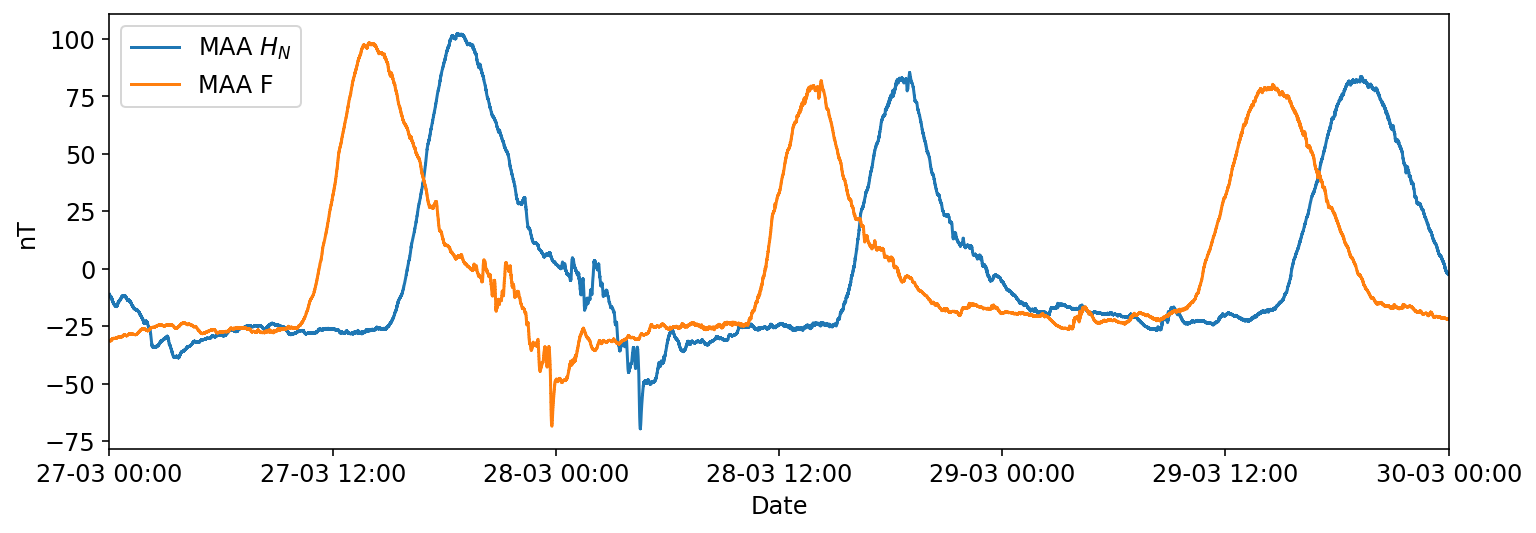

In [16]:
fig, ax = plt.subplots(1,1, figsize = (12,4), sharex=True, sharey=True)

ax.plot(df_MAA['X'].loc['2021-03-27':'2021-03-29'] - df_MAA['X'].loc['2021-03-27':'2021-03-29'].mean(), label = 'MAA $H_N$')
ax.plot(df_MAA['Fsc'].loc['2021-03-27':'2021-03-29'] - df_MAA['Fsc'].loc['2021-03-27':'2021-03-29'].mean(), label = 'MAA F')


#ax[0].set_ylabel('nT', fontsize = 12)

#ax[1].plot((df_TTB['X'].loc['2020-10-23'] - df_TTB['X'].loc['2020-10-23'].mean()) - (df_KOU['X'].loc['2020-10-23']-df_KOU['X'].loc['2020-10-23'].mean()),label = 'TTB - KOU')

#ax[2].plot((df_MAA['X'].loc['2020-10-23'] - df_MAA['X'].loc['2020-10-23'].mean()) - (df_TTB['X'].loc['2020-10-23']-df_TTB['X'].loc['2020-10-23'].mean()),label = 'MAA - TTB')

ax.legend(prop={'size': 12})
#ax[1].legend()
#ax[2].legend()

ax.set_xlim(np.datetime64('2021-03-27 00:00'),np.datetime64('2021-03-30 00:00 '))
#ax[1].set_xlim(np.datetime64('2020-10-23 00:00'),np.datetime64('2020-10-24 00:00 '))
#ax[2].set_xlim(np.datetime64('2020-10-23 00:00'),np.datetime64('2020-10-24 00:00 '))

#ax.set_title('(a)', fontfamily='serif',  x=0.02, y=0.85, fontsize=12)
#ax[1].set_title('(b)', fontfamily='serif',  x=0.02, y=0.85, fontsize=12)
#ax[2].set_title('(c)', fontfamily='serif',  x=0.02, y=0.85, fontsize=12)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax.set_xlabel('Date', fontsize = 12)
plt.subplots_adjust(wspace=0.0, hspace=0.05)
#ax[0].set_title('2020-10-23',fontsize = 12)


ax.tick_params(axis='both', which='major', labelsize=12)

fig.text(0.07, 0.5, 'nT', va='center', rotation='vertical', fontsize = 12)


#fig.suptitle("2020-10-23",fontsize = 12,y = 0.93)

plt.savefig('new_figs_maa/fig_time_shift.jpeg', bbox_inches='tight', dpi = 1000)
plt.show()

In [906]:
df_ppm

,F
Date,
2021-10-07 00:00:00,26366.26
2021-10-07 00:00:01,26366.23
2021-10-07 00:00:02,26366.28
2021-10-07 00:00:03,26366.24
2021-10-07 00:00:04,26366.32
...,...
2021-10-07 23:59:55,26367.14
2021-10-07 23:59:56,26367.05
2021-10-07 23:59:57,26367.09


<AxesSubplot:>

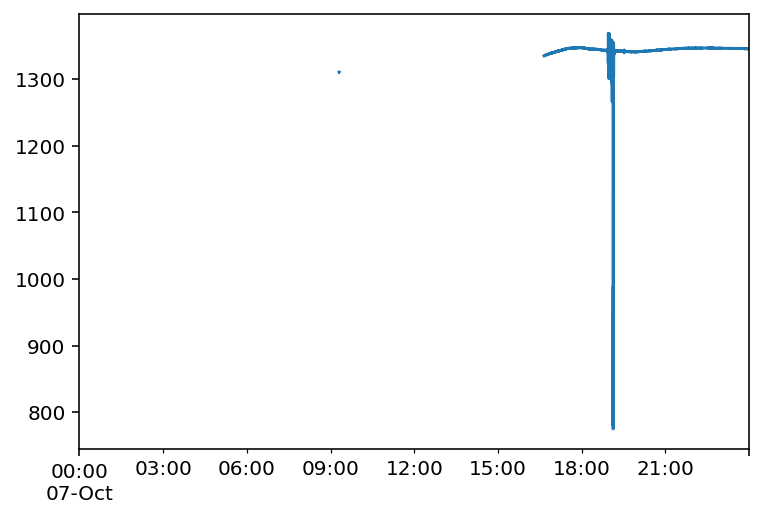

In [909]:
np.sqrt(df_sec['X']**2 + df_sec['Y']**2 + df_sec['Z']**2).plot()

In [47]:
from spacepy import pycdf
import chaosmagpy as cp

files = glob.glob('D:\jmat\MAA0\cdf\*202001*cdf')

In [48]:
df_MAA = pd.DataFrame()
for file in files:
    
    data = pycdf.CDF(file)
#
    df_cdf = pd.DataFrame()
    #df_cdf['F_calc'] = np.sqrt((data['HNvar'][:] + data['H0'][1])**2 + (data['HEvar'][:])**2 + (data['Zvar'][:] + data['Z0'][1])**2 )
    df_cdf['Fsc'] = data['Fsc'][:]
    df_cdf['X'] = data['HNvar'][:]
    df_cdf['Z'] = data['Zvar'][:]
    df_cdf['Y'] = data['HEvar'][:]
    # [Htot] used in TTB and MAA
    #df_cdf['Htot'] = data['HNvar'][:] + data['H0'][1]
    df_cdf.index = pd.to_datetime(cp.data_utils.timestamp(data['time'][:]))
    data.close()
    
    df_MAA = pd.concat([df_MAA, df_cdf])

In [49]:
df_MAA = df_MAA.resample('min').mean()

In [42]:
df_MAA['2020-01-17']

C:\Users\marco\AppData\Local\Temp\ipykernel_6532\2155864352.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_MAA['2020-01-17']


,Fsc,X,Z,Y
2020-01-17 00:00:00,26775.710000,-25.067167,-12.869833,33.181000
2020-01-17 00:01:00,26775.683333,-25.120500,-12.931500,33.229500
2020-01-17 00:02:00,26775.639167,-25.139500,-12.985667,33.317333
2020-01-17 00:03:00,26775.702500,-25.081167,-12.936667,33.286500
2020-01-17 00:04:00,26775.769167,-25.005500,-12.871167,33.243500
...,...,...,...,...
2020-01-17 23:55:00,26780.690000,-19.482333,-11.903000,33.583000
2020-01-17 23:56:00,26780.422500,-19.766833,-12.079833,33.624833
2020-01-17 23:57:00,26780.350833,-19.843667,-12.109000,33.518000
2020-01-17 23:58:00,26780.189167,-20.029500,-12.177167,33.548500


In [5]:
df_MAA = obs.obs_data_processing(station = 'MAA',path = 'D:\\jmat\\MAA0\\cdf', starttime = None,
                        endtime = None, sample = None, plots = True)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x9c in position 137: invalid start byte

In [54]:
pd.read_html('https://wdc.kugi.kyoto-u.ac.jp/dst_realtime/presentmonth/index.html')

ImportError: html5lib not found, please install it

In [52]:
import requests

url = 'https://wdc.kugi.kyoto-u.ac.jp/dst_realtime/presentmonth/index.html'
r = requests.get(url)
r.text
r.close()

In [53]:
import urllib.request

fp = urllib.request.urlopen('https://wdc.kugi.kyoto-u.ac.jp/dst_realtime/presentmonth/index.html')
mybytes = fp.read()

mystr = mybytes.decode("utf8")
fp.close()

print(mystr)

<!-- vvvvv S yyyymm_part1.html vvvvv -->
<html>

<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-jp">
<meta http-equiv="Content-Style-Type" content="text/css">
<title>Real-time (Quicklook) Dst Index Monthly Plot and Table</title>
<link rel="stylesheet" type="text/css" href="dacgsm.css">

<script language="JavaScript">
<!--
  lp=location.pathname;
  if (lp.indexOf("presentmonth") > 0) setTimeout("location.reload()",1800000);
//--> 
</script>

</head>

<body>
<!-- ^^^^^ E yyyymm_part1.html ^^^^^ -->
<div class="dstmain">
Link to
<span><a href="/index.html">Data Center Top Page</a></span>
<span>, <a href="../index.html">Top Page</a></span>
<span>, <a href="../202209/index.html">Last Month</a></span>
<span style="visibility:hidden;">, <a href="../202211/index.html">Next Month</a></span>
<span style="position:absolute; right:0em;">[Updated at 2022-10-11 09:00UT]</span>
<hr>
<div class="space10"></div>
<img align=bottom src="dst2210.png">
<!-- vvvvv S yyyymm_part2.html